<a href="https://colab.research.google.com/github/VAHE1974/low-code-book-projects/blob/main/Power_transformer_health_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install ydata-profiling
import pandas as pd
import ydata_profiling as pandas_profiling # Import using the correct name
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter (action = 'ignore')
plt.style.use ('seaborn')
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 92.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=b3484bcb021cedd47c0ade3fdfb4ba217d298b43aa54eb3c1ce571b0889e04a7
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [15]:
pt_df = pd.read_csv('/content/PT_health.csv',engine="python")
pt_df

Hydrogen  Oxigen  Nitrogen  Methane   CO   CO2  Ethylene  Ethane  \
0        2845    5860     27842     7406   32  1344     16684    5467   
1       12886      61     25041      877   83   864         4     305   
2        2820   16400     56300      144  257  1080       206      11   
3        1099      70     37520      545  184  1402         6     230   
4        3210    3570     47900      160  360  2130         4      43   
..        ...     ...       ...      ...  ...   ...       ...     ...   
465        15     227     52900        3   60   853         3      84   
466        15     334     47100        3   64   622         3     108   
467        15    1280     35000        2  675  2530         0       0   
468        15     169     50600        5   77   532         0      72   
469        15     308     39700        3   64   581         5      27   

     Acethylene  DBDS  Power factor  Interfacial V  Dielectric rigidity  \
0             7  19.0          1.00             45                   55   
1             0  45.0          1.00             45                   55   
2          2190   1.0          1.00             39                   52   
3             0  87.0          4.58             33                   49   
4             4   1.0          0.77             44                   55   
..          ...   ...           ...            ...                  ...   
465           0   0.0          1.00             32                   56   
466           0   0.0          1.00             32                   55   
467           0   5.0          0.30             45                   58   
468           0   0.0          1.21             33                   54   
469           0   0.0          1.00             32                   60   

     Water content  Health index  Life expectation  
0                0          95.2              19.0  
1                0          85.5              19.0  
2               11          85.3              19.0  
3                5          85.3               6.0  
4                3          85.2               6.0  
..             ...           ...               ...  
465             28          13.4              51.0  
466             12          13.4              51.0  
467              8          13.4               6.5  
468             11          13.4              51.0  
469             18          13.4              51.0  

[470 rows x 16 columns]

In [11]:
pt_df.head()

Hydrogen  Oxigen  Nitrogen  Methane   CO   CO2  Ethylene  Ethane  \
0      2845    5860     27842     7406   32  1344     16684    5467   
1     12886      61     25041      877   83   864         4     305   
2      2820   16400     56300      144  257  1080       206      11   
3      1099      70     37520      545  184  1402         6     230   
4      3210    3570     47900      160  360  2130         4      43   

   Acethylene  DBDS  Power factor  Interfacial V  Dielectric rigidity  \
0           7  19.0          1.00             45                   55   
1           0  45.0          1.00             45                   55   
2        2190   1.0          1.00             39                   52   
3           0  87.0          4.58             33                   49   
4           4   1.0          0.77             44                   55   

   Water content  Health index  Life expectation  
0              0          95.2              19.0  
1              0          85.5              19.0  
2             11          85.3              19.0  
3              5          85.3               6.0  
4              3          85.2               6.0

In [16]:
df = pd.DataFrame (pt_df)
df

Hydrogen  Oxigen  Nitrogen  Methane   CO   CO2  Ethylene  Ethane  \
0        2845    5860     27842     7406   32  1344     16684    5467   
1       12886      61     25041      877   83   864         4     305   
2        2820   16400     56300      144  257  1080       206      11   
3        1099      70     37520      545  184  1402         6     230   
4        3210    3570     47900      160  360  2130         4      43   
..        ...     ...       ...      ...  ...   ...       ...     ...   
465        15     227     52900        3   60   853         3      84   
466        15     334     47100        3   64   622         3     108   
467        15    1280     35000        2  675  2530         0       0   
468        15     169     50600        5   77   532         0      72   
469        15     308     39700        3   64   581         5      27   

     Acethylene  DBDS  Power factor  Interfacial V  Dielectric rigidity  \
0             7  19.0          1.00             45                   55   
1             0  45.0          1.00             45                   55   
2          2190   1.0          1.00             39                   52   
3             0  87.0          4.58             33                   49   
4             4   1.0          0.77             44                   55   
..          ...   ...           ...            ...                  ...   
465           0   0.0          1.00             32                   56   
466           0   0.0          1.00             32                   55   
467           0   5.0          0.30             45                   58   
468           0   0.0          1.21             33                   54   
469           0   0.0          1.00             32                   60   

     Water content  Health index  Life expectation  
0                0          95.2              19.0  
1                0          85.5              19.0  
2               11          85.3              19.0  
3                5          85.3               6.0  
4                3          85.2               6.0  
..             ...           ...               ...  
465             28          13.4              51.0  
466             12          13.4              51.0  
467              8          13.4               6.5  
468             11          13.4              51.0  
469             18          13.4              51.0  

[470 rows x 16 columns]

In [17]:
df.shape

(470, 16)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hydrogen             470 non-null    int64  
 1   Oxigen               470 non-null    int64  
 2   Nitrogen             470 non-null    int64  
 3   Methane              470 non-null    int64  
 4   CO                   470 non-null    int64  
 5   CO2                  470 non-null    int64  
 6   Ethylene             470 non-null    int64  
 7   Ethane               470 non-null    int64  
 8   Acethylene           470 non-null    int64  
 9   DBDS                 470 non-null    float64
 10  Power factor         470 non-null    float64
 11  Interfacial V        470 non-null    int64  
 12  Dielectric rigidity  470 non-null    int64  
 13  Water content        470 non-null    int64  
 14  Health index         470 non-null    float64
 15  Life expectation     470 non-null    flo

In [20]:
df.describe()

Hydrogen         Oxigen      Nitrogen      Methane           CO  \
count    470.000000     470.000000    470.000000   470.000000   470.000000   
mean     404.261702    8357.372340  47759.561702    79.695745   244.000000   
std     2002.142678   14164.233283  13760.451816   489.320336   237.267485   
min        0.000000      57.000000   3600.000000     0.000000    10.000000   
25%        4.000000     496.000000  41700.000000     2.000000    66.000000   
50%        9.000000    3810.000000  49100.000000     3.000000   150.500000   
75%       34.000000   14875.000000  55875.000000     7.000000   361.750000   
max    23349.000000  249900.000000  85300.000000  7406.000000  1730.000000   

                CO2      Ethylene       Ethane   Acethylene        DBDS  \
count    470.000000    470.000000   470.000000   470.000000  470.000000   
mean    1816.414894    162.923404    81.940426    91.491489   17.036596   
std     2256.790519   1323.811504   342.573636   644.365828   46.735057   
min       48.000000      0.000000     0.000000     0.000000    0.000000   
25%      641.750000      0.000000     0.000000     0.000000    0.000000   
50%     1125.000000      3.000000     4.000000     0.000000    0.000000   
75%     2257.500000      6.000000    69.750000     0.000000    2.000000   
max    24900.000000  16684.000000  5467.000000  9740.000000  227.000000   

       Power factor  Interfacial V  Dielectric rigidity  Water content  \
count    470.000000     470.000000           470.000000     470.000000   
mean       1.849043      38.434043            53.495745      16.282979   
std        6.144009       6.178830             6.458906      17.115646   
min        0.050000      21.000000            27.000000       0.000000   
25%        0.570000      32.000000            51.000000       5.000000   
50%        1.000000      39.000000            54.000000      12.000000   
75%        1.000000      44.000000            56.000000      21.000000   
max       73.200000      57.000000            75.000000     183.000000   

       Health index  Life expectation  
count    470.000000        470.000000  
mean      27.504043         33.010426  
std       17.741458         17.791047  
min       13.400000          6.000000  
25%       13.400000         19.000000  
50%       13.400000         32.000000  
75%       38.550000         51.000000  
max       95.200000         51.000000

In [21]:
def check(df):
    List=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        List.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(List)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check
check(df)

column   dtypes  nunique  sum_null
0              Hydrogen    int64      111         0
1                Oxigen    int64      382         0
2              Nitrogen    int64      317         0
3               Methane    int64       74         0
4                    CO    int64      298         0
5                   CO2    int64      374         0
6              Ethylene    int64       61         0
7                Ethane    int64      141         0
8            Acethylene    int64       26         0
9                  DBDS  float64       57         0
10         Power factor  float64      172         0
11        Interfacial V    int64       29         0
12  Dielectric rigidity    int64       41         0
13        Water content    int64       63         0
14         Health index  float64       65         0
15     Life expectation  float64       43         0

from matplotlib import pyplot as plt
_df_0['nunique'].plot(kind='hist', bins=20, title='nunique')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('dtypes').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['sum_null']
  ys = series['nunique']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('sum_null', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('dtypes')):
  _plot_series(series, series_name, i)
  fig.legend(title='dtypes', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sum_null')
_ = plt.ylabel('nunique')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['sum_null']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'sum_null'}, axis=1)
              .sort_values('sum_null', ascending=True))
  xs = counted['sum_null']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('sum_null', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('dtypes')):
  _plot_series(series, series_name, i)
  fig.legend(title='dtypes', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sum_null')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_4['nunique'].plot(kind='line', figsize=(8, 4), title='nunique')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_5['dtypes'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_5, x='nunique', y='dtypes', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [22]:
df.isna().sum()

Hydrogen               0
Oxigen                 0
Nitrogen               0
Methane                0
CO                     0
CO2                    0
Ethylene               0
Ethane                 0
Acethylene             0
DBDS                   0
Power factor           0
Interfacial V          0
Dielectric rigidity    0
Water content          0
Health index           0
Life expectation       0
dtype: int64

In [23]:
df.dropna (how = 'any')

Hydrogen  Oxigen  Nitrogen  Methane   CO   CO2  Ethylene  Ethane  \
0        2845    5860     27842     7406   32  1344     16684    5467   
1       12886      61     25041      877   83   864         4     305   
2        2820   16400     56300      144  257  1080       206      11   
3        1099      70     37520      545  184  1402         6     230   
4        3210    3570     47900      160  360  2130         4      43   
..        ...     ...       ...      ...  ...   ...       ...     ...   
465        15     227     52900        3   60   853         3      84   
466        15     334     47100        3   64   622         3     108   
467        15    1280     35000        2  675  2530         0       0   
468        15     169     50600        5   77   532         0      72   
469        15     308     39700        3   64   581         5      27   

     Acethylene  DBDS  Power factor  Interfacial V  Dielectric rigidity  \
0             7  19.0          1.00             45                   55   
1             0  45.0          1.00             45                   55   
2          2190   1.0          1.00             39                   52   
3             0  87.0          4.58             33                   49   
4             4   1.0          0.77             44                   55   
..          ...   ...           ...            ...                  ...   
465           0   0.0          1.00             32                   56   
466           0   0.0          1.00             32                   55   
467           0   5.0          0.30             45                   58   
468           0   0.0          1.21             33                   54   
469           0   0.0          1.00             32                   60   

     Water content  Health index  Life expectation  
0                0          95.2              19.0  
1                0          85.5              19.0  
2               11          85.3              19.0  
3                5          85.3               6.0  
4                3          85.2               6.0  
..             ...           ...               ...  
465             28          13.4              51.0  
466             12          13.4              51.0  
467              8          13.4               6.5  
468             11          13.4              51.0  
469             18          13.4              51.0  

[470 rows x 16 columns]

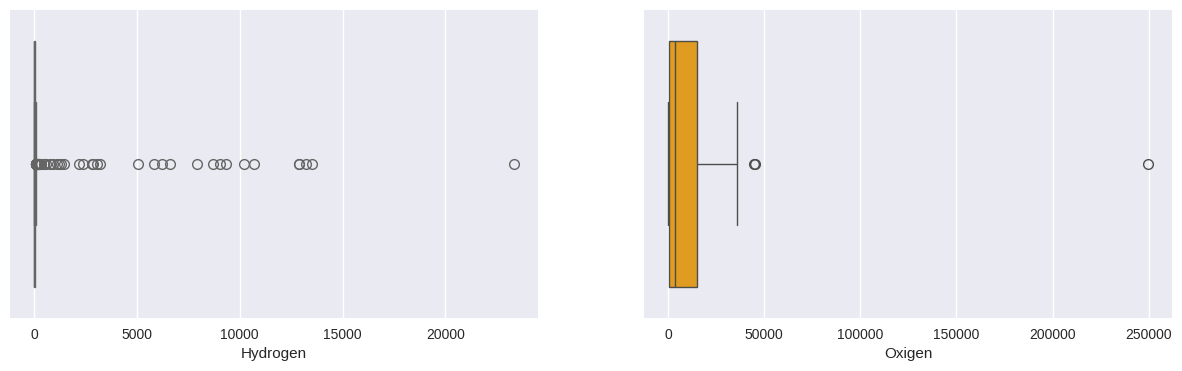

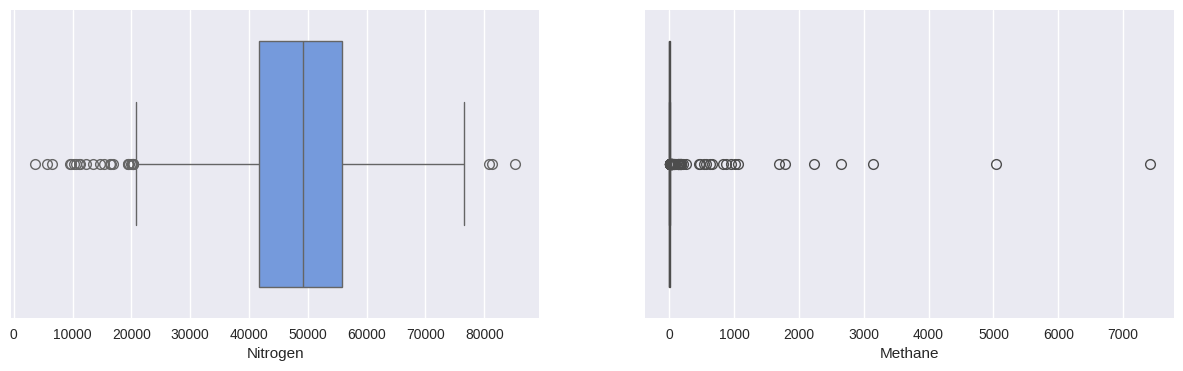

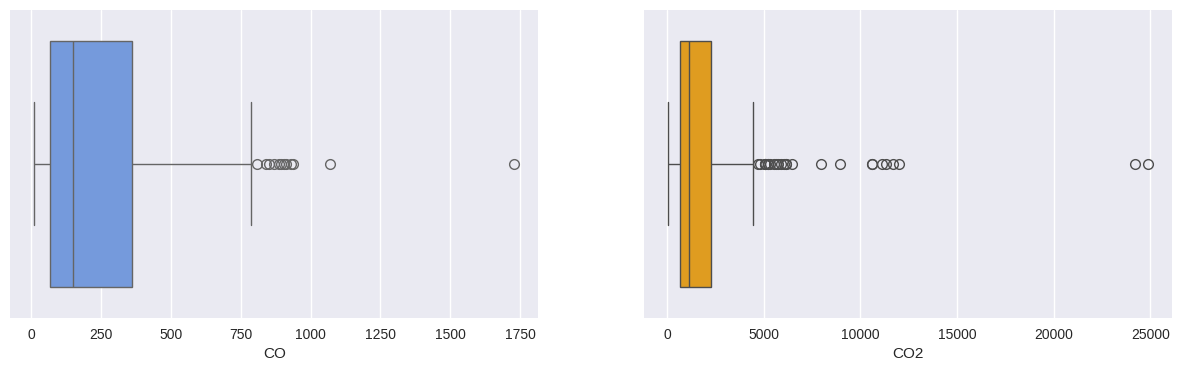

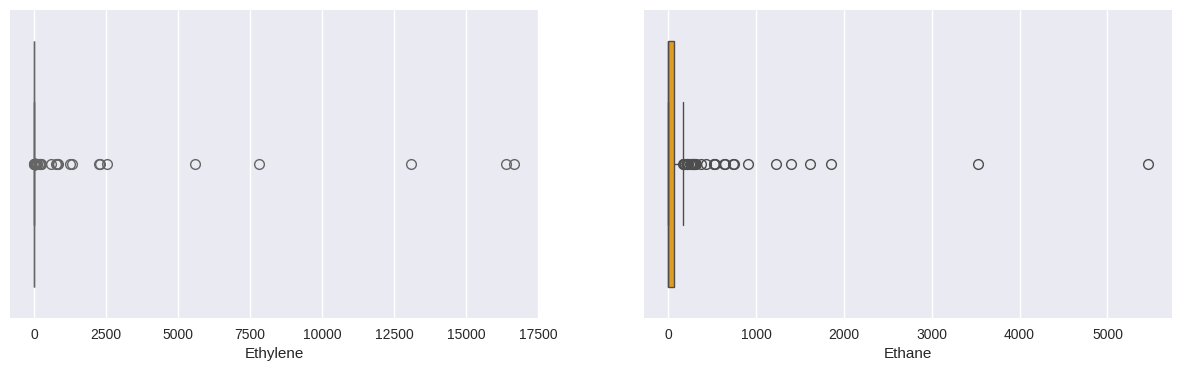

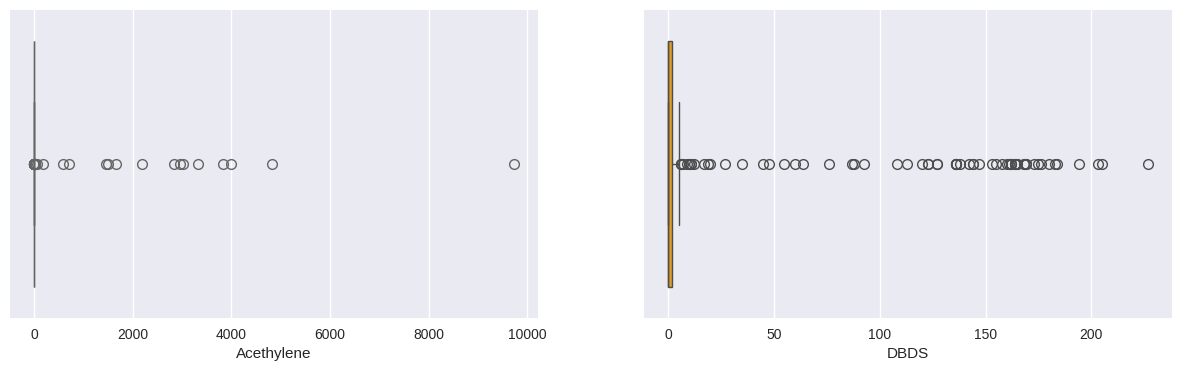

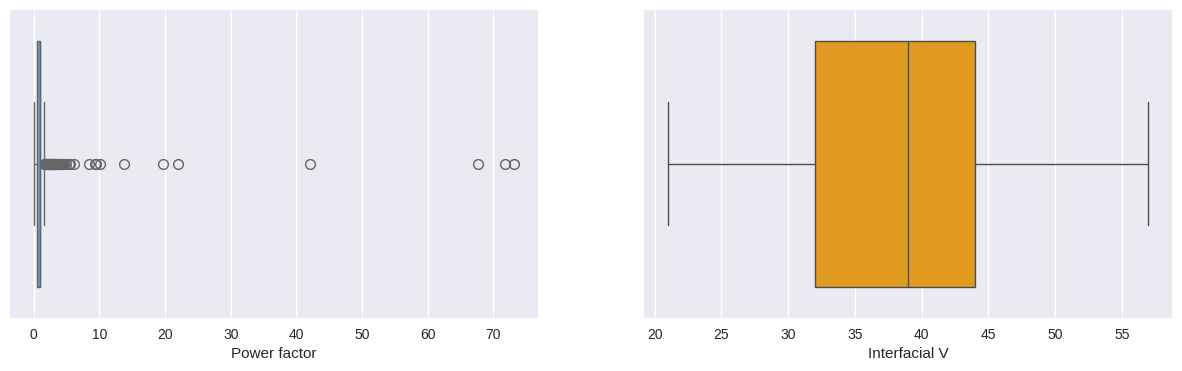

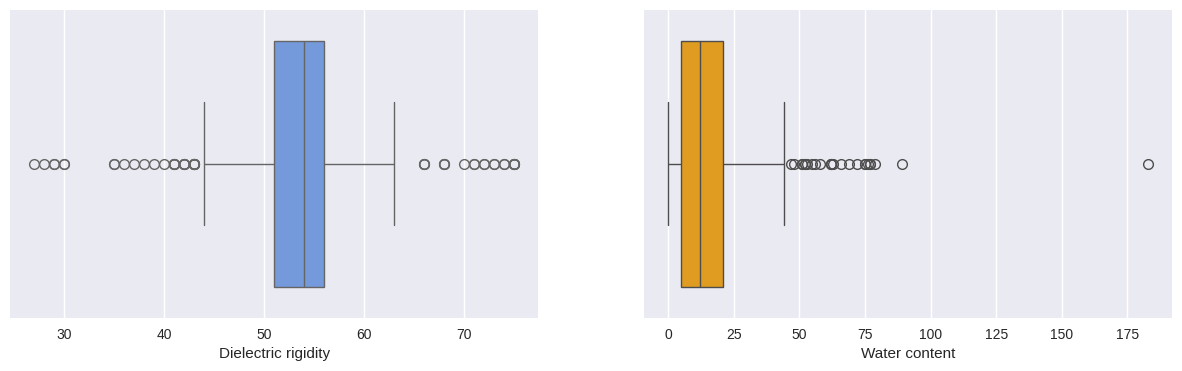

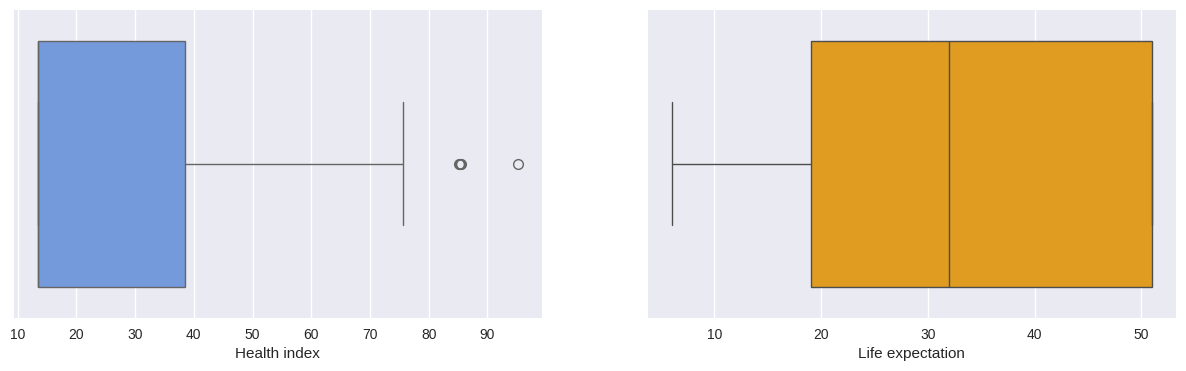

In [28]:
numerical = ['Hydrogen' , 'Oxigen' , 'Nitrogen' , 'Methane' , 'CO', 'CO2', 'Ethylene', 'Ethane', 'Acethylene', 'DBDS', 'Power factor', 'Interfacial V', 'Dielectric rigidity', 'Water content', 'Health index', 'Life expectation']
i = 0


while i < len(numerical):
    fig = plt.figure(figsize=[15, 4])
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, first location
    sns.boxplot(x=numerical[i], data=df, color='cornflowerblue')
    i += 1  # next step
    if i == len(numerical):
        break
    plt.subplot(1, 2, 2)
    sns.boxplot(x=numerical[i], data=df, color='orange')
    i += 1
    plt.show()

In [29]:
df1=df.index[(df['Hydrogen']>15000)]
df2=df.index[(df['Oxigen']>40000)]
df3=df.index[(df['Nitrogen']>80000)]
df4=df.index[(df['Methane']>2000)]
df5=df.index[(df['CO']>1250)]
df6=df.index[(df['CO2']>15000)]
df7=df.index[(df['Ethylene']>7500)]
df8=df.index[(df['Ethane']>3000)]
df9=df.index[(df['Acethylene']>6000)]
df10=df.index[(df['Power factor']>30)]
df11=df.index[(df['Water content']>100)]
df12=df.index[(df['Health index']>80)]

In [30]:
print(df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12)

Index([13], dtype='int64') Index([45, 250, 395], dtype='int64') Index([24, 63, 121], dtype='int64') Index([0, 5, 13, 15, 16], dtype='int64') Index([19], dtype='int64') Index([19, 361], dtype='int64') Index([0, 14, 15, 16], dtype='int64') Index([0, 13], dtype='int64') Index([17], dtype='int64') Index([19, 38, 39, 40], dtype='int64') Index([386], dtype='int64') Index([0, 1, 2, 3, 4], dtype='int64')


In [31]:
DF= df.drop([13,45,250,395,24,63,121,0,5,14,15,16,17,19,361,38,39,40,386,0,1,2,3,4])
DF

Hydrogen  Oxigen  Nitrogen  Methane   CO   CO2  Ethylene  Ethane  \
6       10200   11900     33700      573   87   611         0     162   
7           3   15459     41347        5   68   902        12       2   
8          16    2470     59600        8  520  2660         5       8   
9         488   11861     48353       13   85  1957        29      23   
10          4   26100     60600        1  206  1440        13       0   
..        ...     ...       ...      ...  ...   ...       ...     ...   
465        15     227     52900        3   60   853         3      84   
466        15     334     47100        3   64   622         3     108   
467        15    1280     35000        2  675  2530         0       0   
468        15     169     50600        5   77   532         0      72   
469        15     308     39700        3   64   581         5      27   

     Acethylene   DBDS  Power factor  Interfacial V  Dielectric rigidity  \
6             0    1.0          3.53             45                   55   
7            13    5.0          0.58             41                   71   
8             2  164.0          0.29             44                   56   
9             0  164.0          0.27             37                   72   
10           13    5.0          1.32             40                   56   
..          ...    ...           ...            ...                  ...   
465           0    0.0          1.00             32                   56   
466           0    0.0          1.00             32                   55   
467           0    5.0          0.30             45                   58   
468           0    0.0          1.21             33                   54   
469           0    0.0          1.00             32                   60   

     Water content  Health index  Life expectation  
6                5          75.6               6.0  
7                6          73.2              19.0  
8                4          72.8               6.0  
9               10          68.0               6.0  
10               4          63.4               6.0  
..             ...           ...               ...  
465             28          13.4              51.0  
466             12          13.4              51.0  
467              8          13.4               6.5  
468             11          13.4              51.0  
469             18          13.4              51.0  

[447 rows x 16 columns]

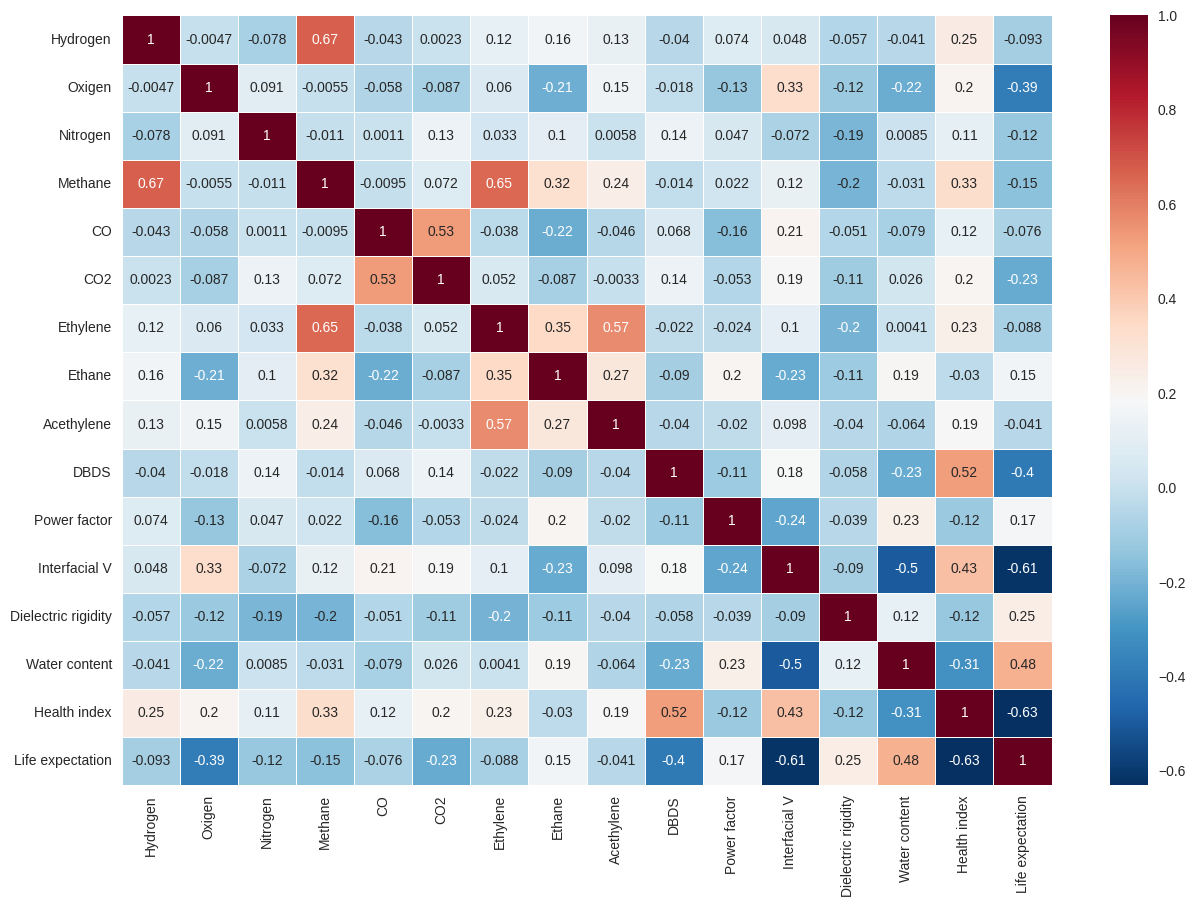

In [32]:
fig, ax = plt.subplots (figsize = (15,10))
sns.heatmap (DF.corr (), cmap = 'RdBu_r' , cbar = True , annot = True , linewidth = 0.5 ,ax = ax)
plt.show ()

In [33]:
DF.corr()

Hydrogen    Oxigen  Nitrogen   Methane        CO  \
Hydrogen             1.000000 -0.004660 -0.077660  0.673859 -0.042674   
Oxigen              -0.004660  1.000000  0.090616 -0.005452 -0.057830   
Nitrogen            -0.077660  0.090616  1.000000 -0.010834  0.001092   
Methane              0.673859 -0.005452 -0.010834  1.000000 -0.009482   
CO                  -0.042674 -0.057830  0.001092 -0.009482  1.000000   
CO2                  0.002306 -0.086541  0.133594  0.071568  0.529919   
Ethylene             0.118033  0.059563  0.032903  0.653096 -0.038142   
Ethane               0.155842 -0.210850  0.101650  0.316615 -0.217563   
Acethylene           0.125041  0.152095  0.005800  0.237193 -0.046389   
DBDS                -0.040382 -0.018068  0.138545 -0.013886  0.067913   
Power factor         0.073892 -0.130755  0.047371  0.021895 -0.161805   
Interfacial V        0.048342  0.334998 -0.071601  0.123397  0.209552   
Dielectric rigidity -0.056902 -0.120401 -0.185093 -0.195061 -0.051303   
Water content       -0.040849 -0.217485  0.008500 -0.030987 -0.078904   
Health index         0.249212  0.204796  0.108633  0.329380  0.115079   
Life expectation    -0.093358 -0.388730 -0.123163 -0.148015 -0.076109   

                          CO2  Ethylene    Ethane  Acethylene      DBDS  \
Hydrogen             0.002306  0.118033  0.155842    0.125041 -0.040382   
Oxigen              -0.086541  0.059563 -0.210850    0.152095 -0.018068   
Nitrogen             0.133594  0.032903  0.101650    0.005800  0.138545   
Methane              0.071568  0.653096  0.316615    0.237193 -0.013886   
CO                   0.529919 -0.038142 -0.217563   -0.046389  0.067913   
CO2                  1.000000  0.051584 -0.087243   -0.003279  0.137567   
Ethylene             0.051584  1.000000  0.345841    0.568962 -0.022243   
Ethane              -0.087243  0.345841  1.000000    0.274867 -0.090018   
Acethylene          -0.003279  0.568962  0.274867    1.000000 -0.040364   
DBDS                 0.137567 -0.022243 -0.090018   -0.040364  1.000000   
Power factor        -0.053372 -0.023975  0.197992   -0.019809 -0.113214   
Interfacial V        0.190250  0.104236 -0.229286    0.098081  0.184049   
Dielectric rigidity -0.108121 -0.201196 -0.112396   -0.039505 -0.058129   
Water content        0.026011  0.004071  0.193608   -0.063761 -0.227983   
Health index         0.201687  0.230261 -0.030477    0.188721  0.524412   
Life expectation    -0.228128 -0.088107  0.154263   -0.041137 -0.401434   

                     Power factor  Interfacial V  Dielectric rigidity  \
Hydrogen                 0.073892       0.048342            -0.056902   
Oxigen                  -0.130755       0.334998            -0.120401   
Nitrogen                 0.047371      -0.071601            -0.185093   
Methane                  0.021895       0.123397            -0.195061   
CO                      -0.161805       0.209552            -0.051303   
CO2                     -0.053372       0.190250            -0.108121   
Ethylene                -0.023975       0.104236            -0.201196   
Ethane                   0.197992      -0.229286            -0.112396   
Acethylene              -0.019809       0.098081            -0.039505   
DBDS                    -0.113214       0.184049            -0.058129   
Power factor             1.000000      -0.243634            -0.038595   
Interfacial V           -0.243634       1.000000            -0.090207   
Dielectric rigidity     -0.038595      -0.090207             1.000000   
Water content            0.234748      -0.502375             0.118446   
Health index            -0.118562       0.432326            -0.122172   
Life expectation         0.165581      -0.612261             0.246000   

                     Water content  Health index  Life expectation  
Hydrogen                 -0.040849      0.249212         -0.093358  
Oxigen                   -0.217485      0.204796         -0.388730  
Nitrogen                  0.008500      0.108633      

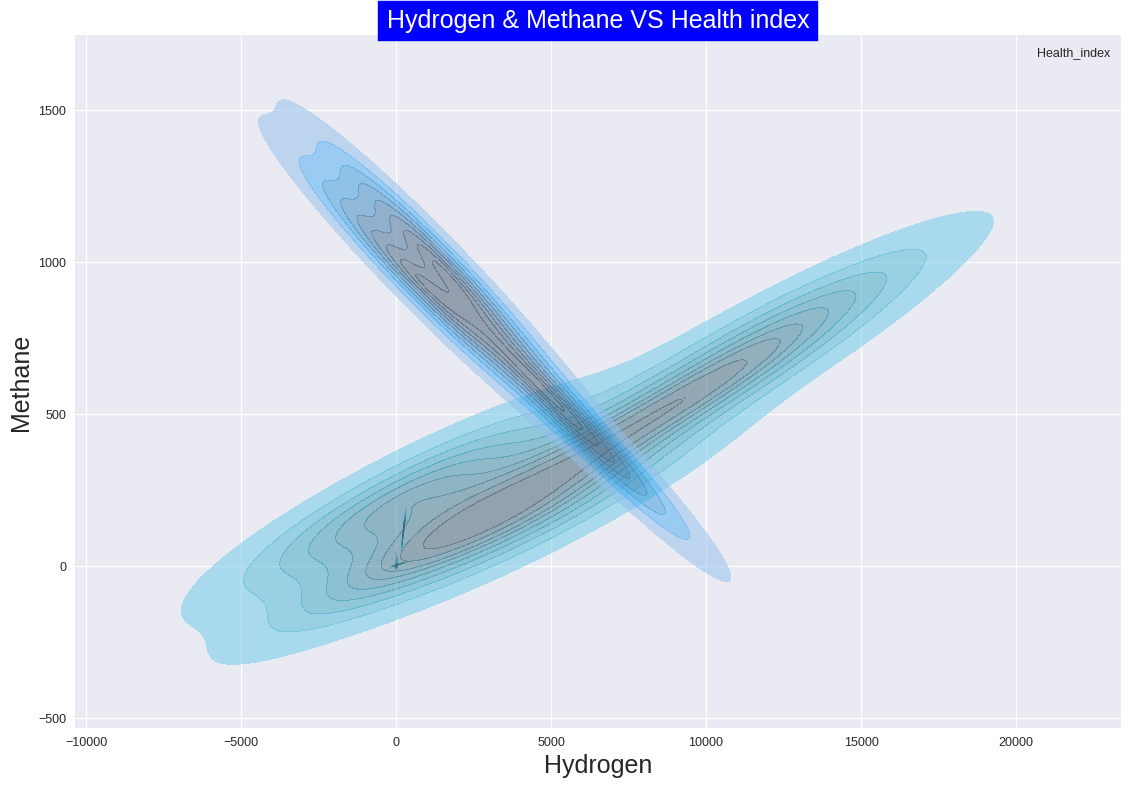

In [35]:
plt.figure (figsize = (15,10) , dpi = 90)
sns.kdeplot (data = DF , x = 'Hydrogen' , y = 'Methane' , hue = 'Health index' , shade = True , fill = True , common_norm = False , palette = 'crest' , alpha = 0.5 , linewidth = 0)
plt.xlabel ('Hydrogen' , fontsize = 20)
plt.ylabel ('Methane' , fontsize = 20)
plt.legend (['Health_index'] , loc = 'best')
plt.title ('Hydrogen & Methane VS Health index' , backgroundcolor = 'blue' , c = 'white' , fontsize = 20)
plt.grid
plt.show ()

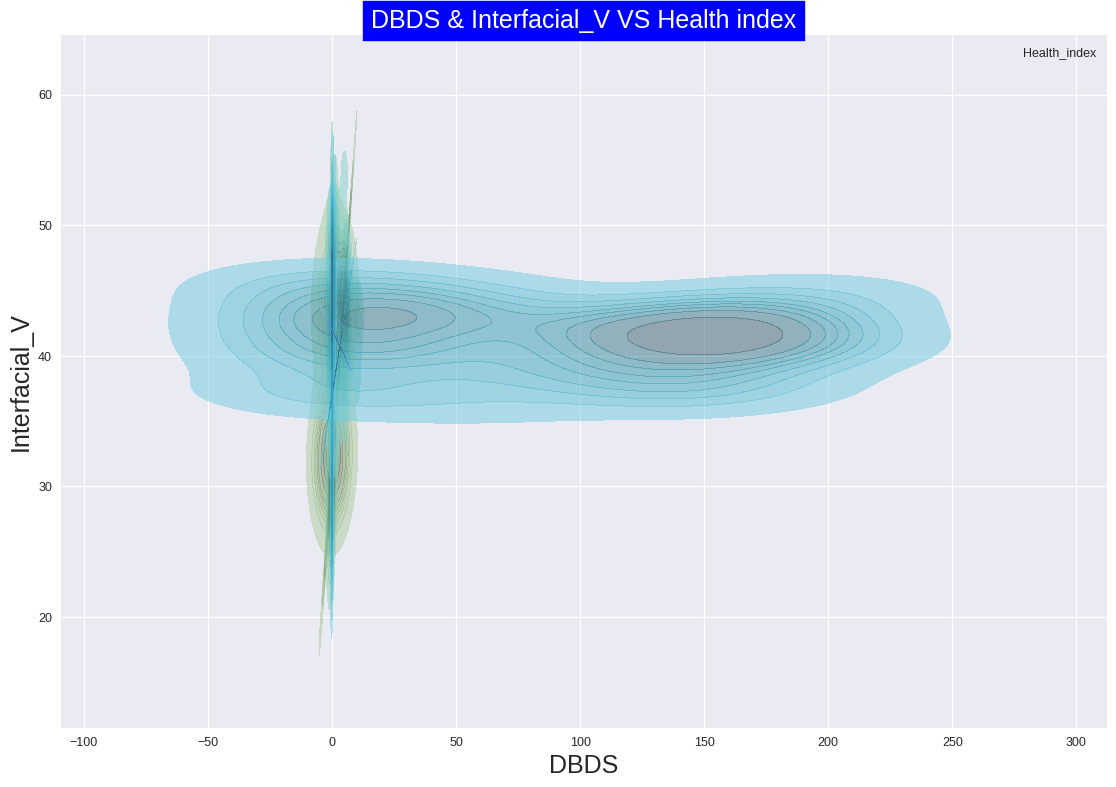

In [36]:
plt.figure (figsize = (15,10) , dpi = 90)
sns.kdeplot (data = DF , x = 'DBDS' , y = 'Interfacial V' , hue = 'Health index' , shade = True , fill = True , common_norm = False , palette = 'crest' , alpha = 0.5 , linewidth = 0)
plt.xlabel ('DBDS' , fontsize = 20)
plt.ylabel ('Interfacial_V' , fontsize = 20)
plt.legend (['Health_index'] , loc = 'best')
plt.title ('DBDS & Interfacial_V VS Health index' , backgroundcolor = 'blue' , c = 'white' , fontsize = 20)
plt.grid
plt.show ()

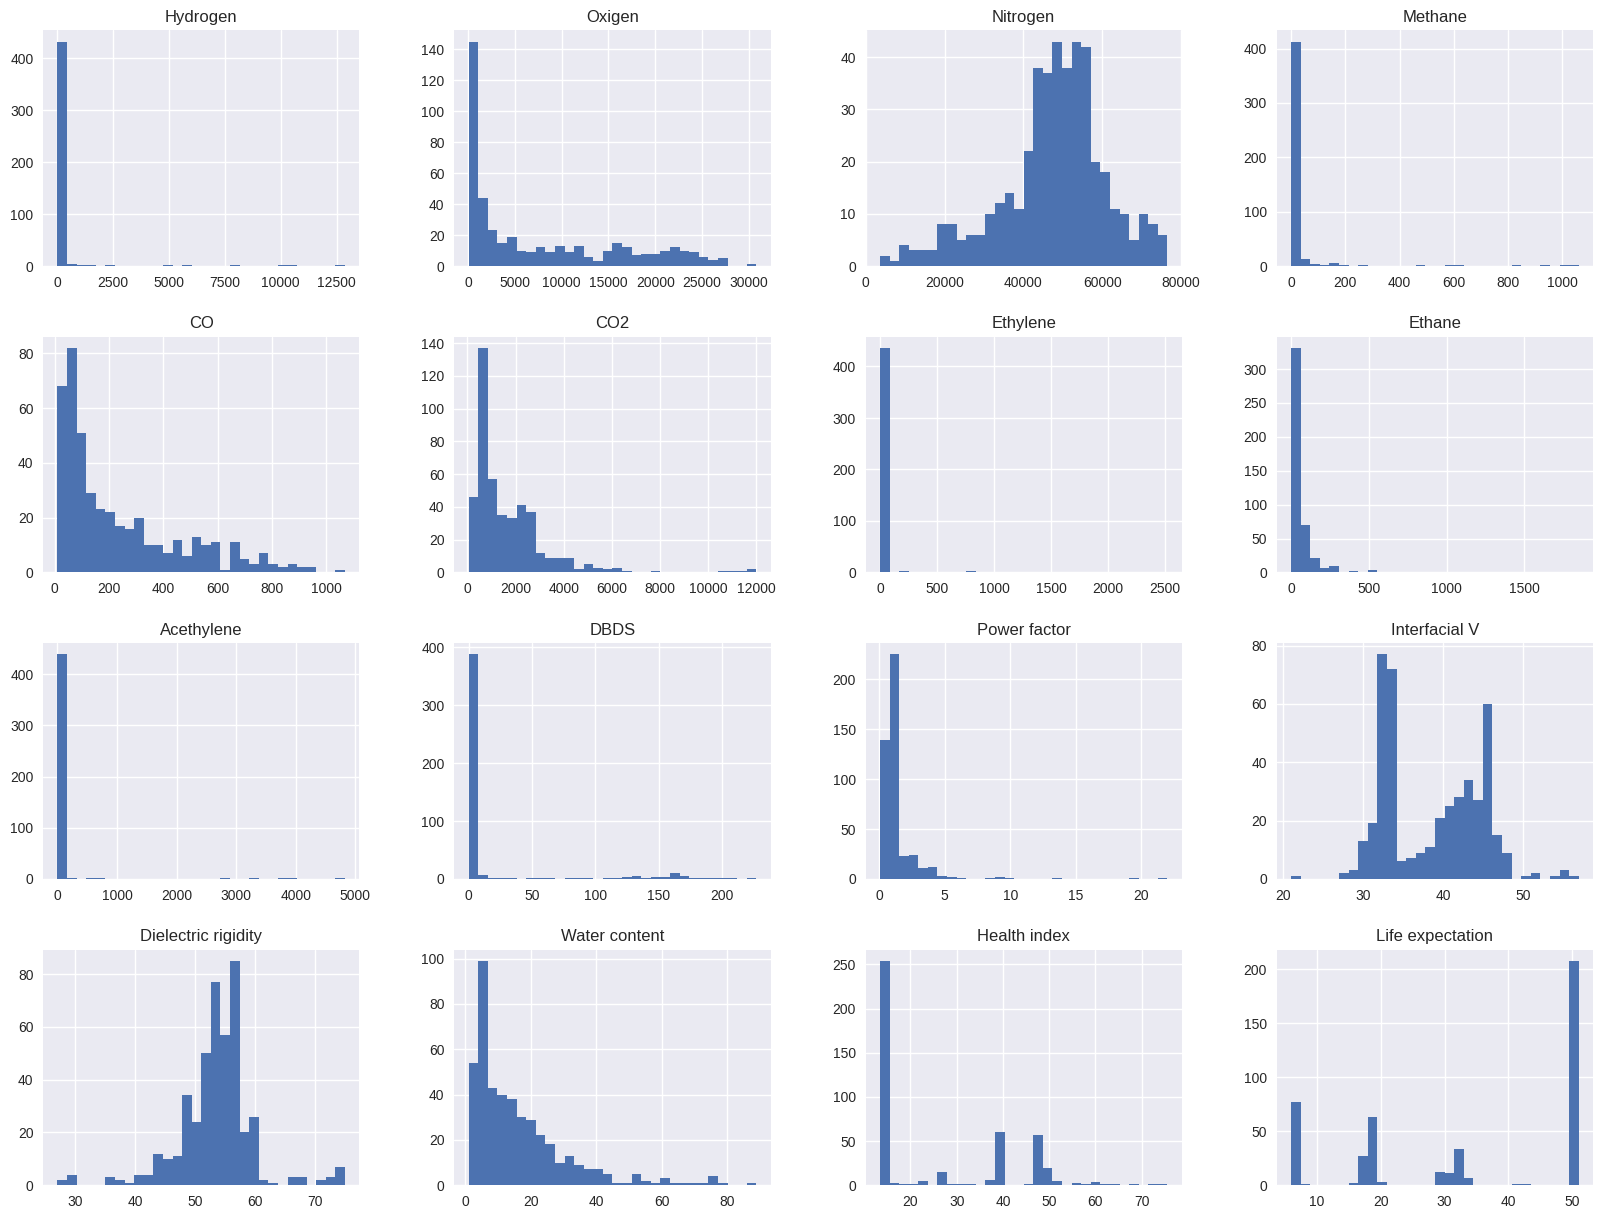

In [37]:
#histogram for all columns
DF.hist(bins=30,figsize=(20,15))
plt.show()

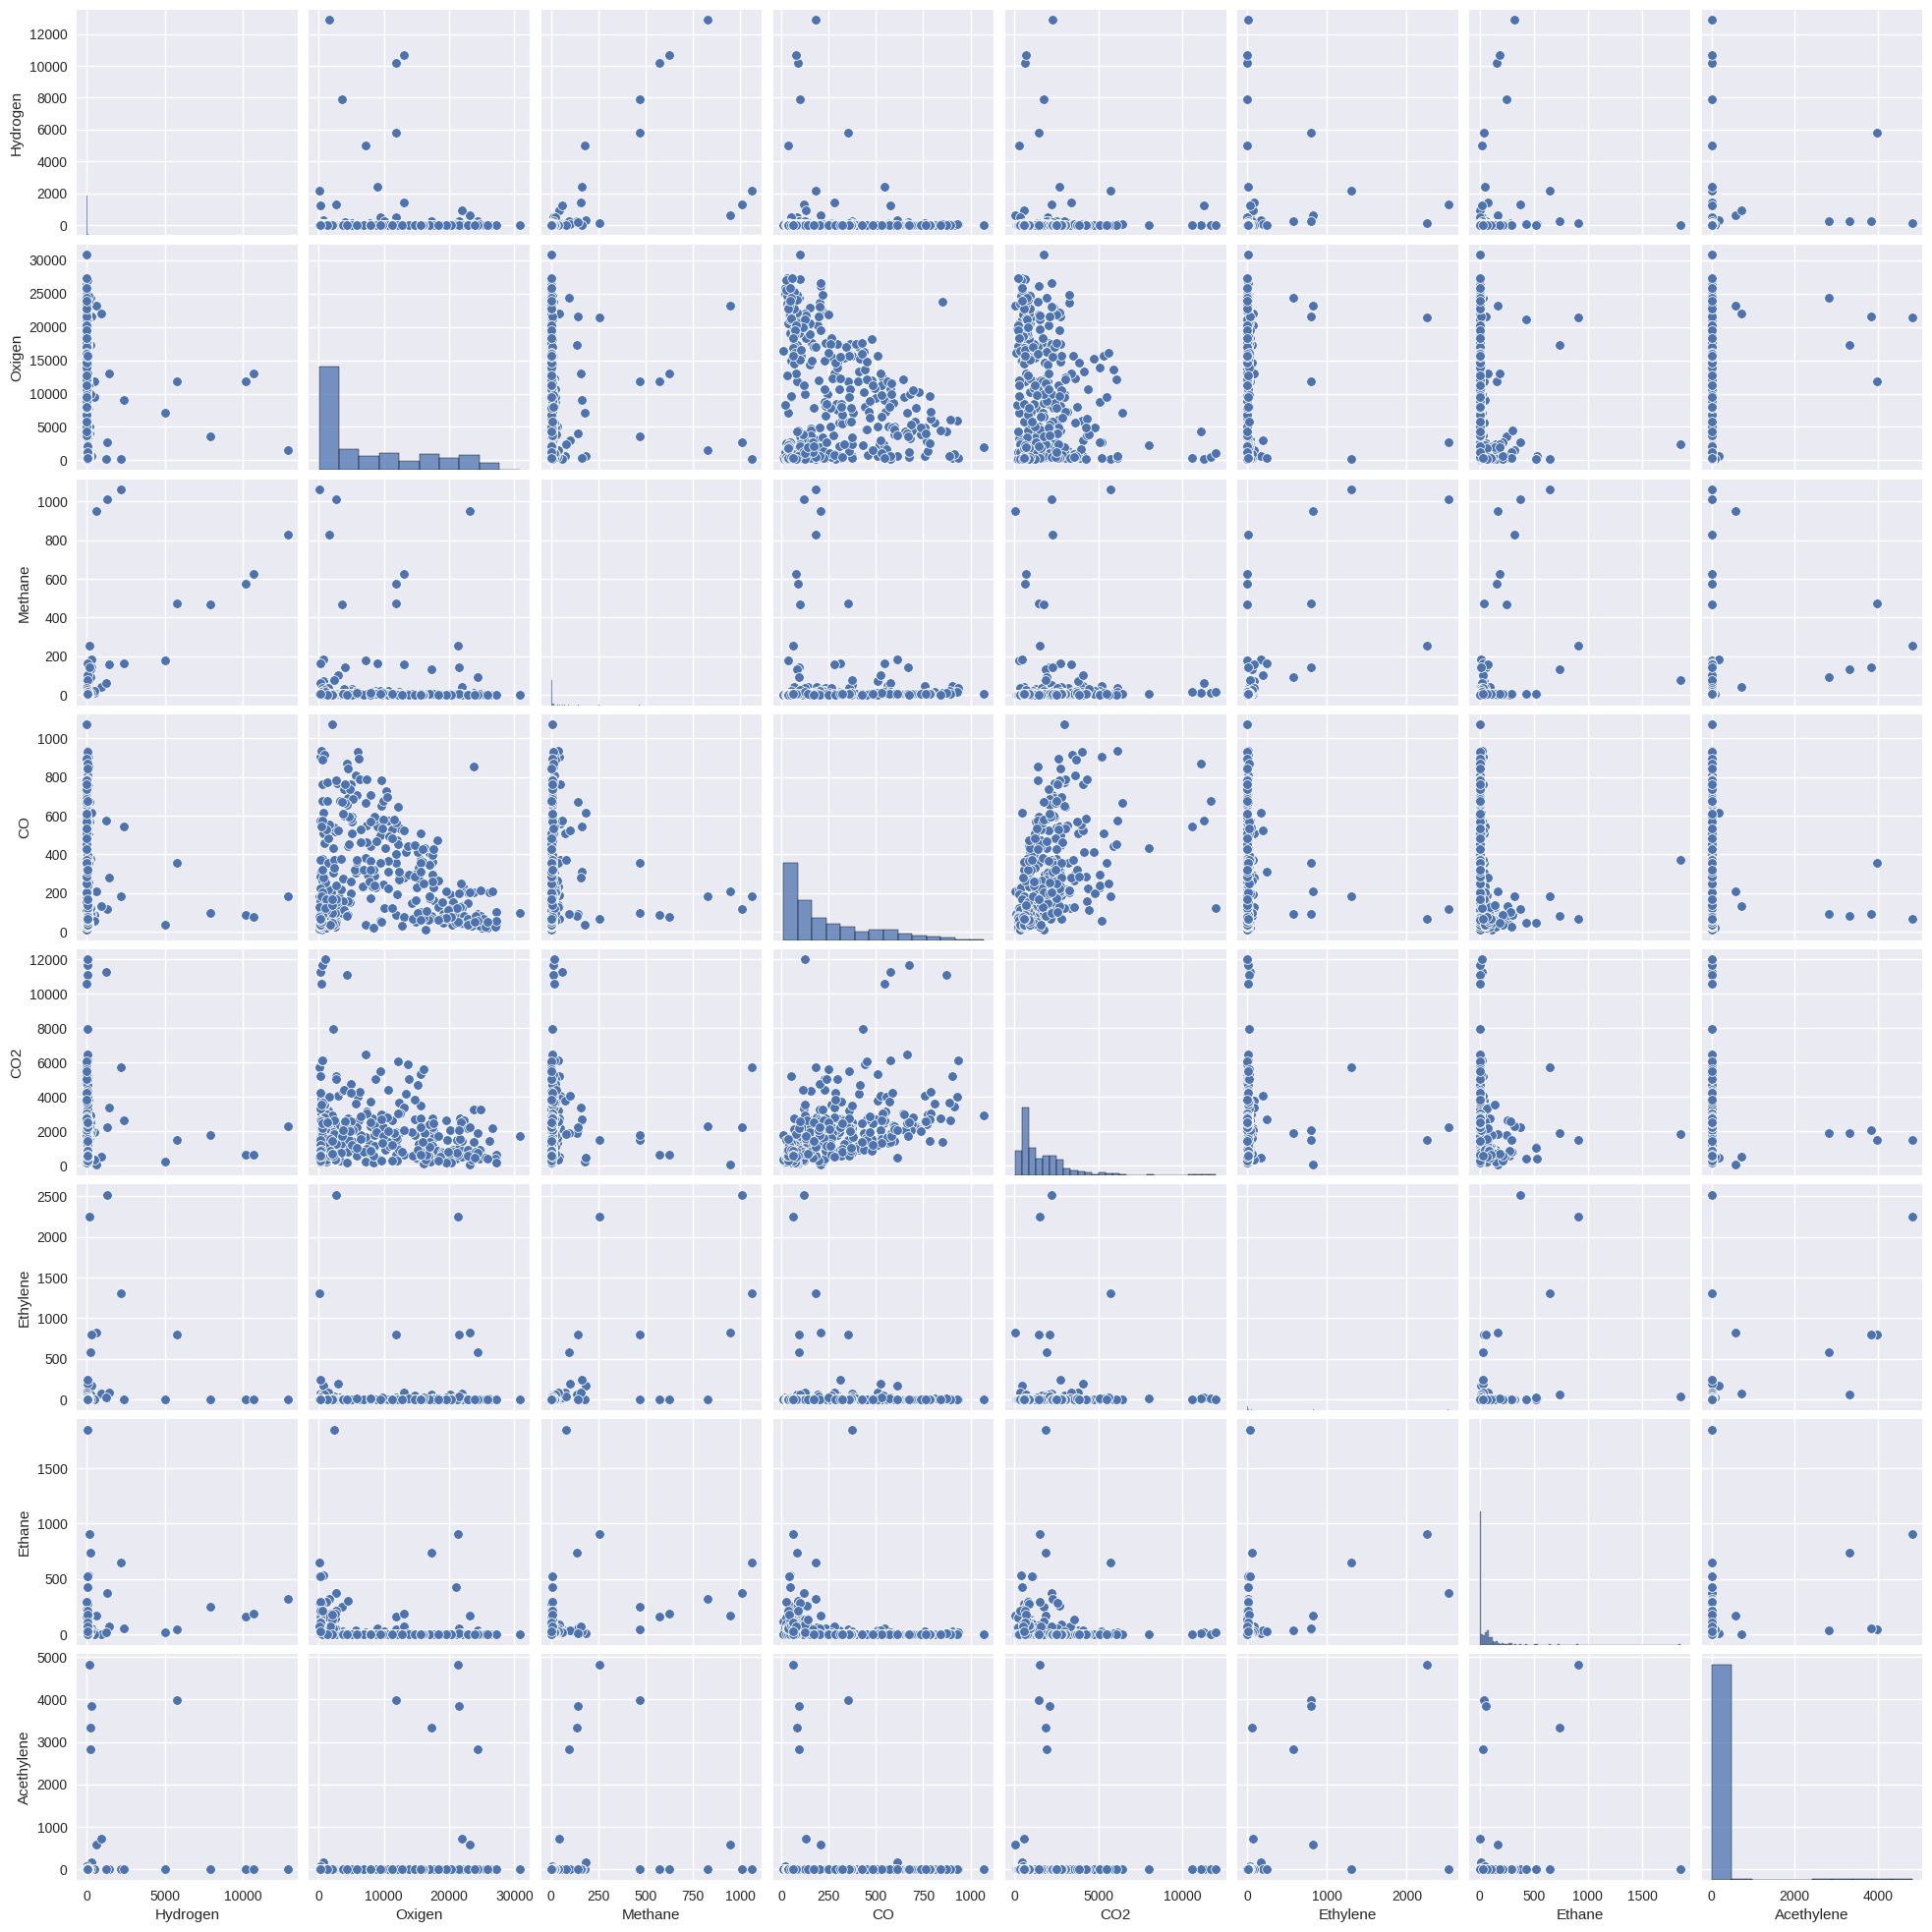

In [39]:
sns.pairplot(DF,
    x_vars=["Hydrogen", "Oxigen", "Methane", "CO","CO2", "Ethylene", "Ethane", "Acethylene"],
    y_vars=["Hydrogen", "Oxigen", "Methane", "CO","CO2", "Ethylene", "Ethane", "Acethylene"]
)

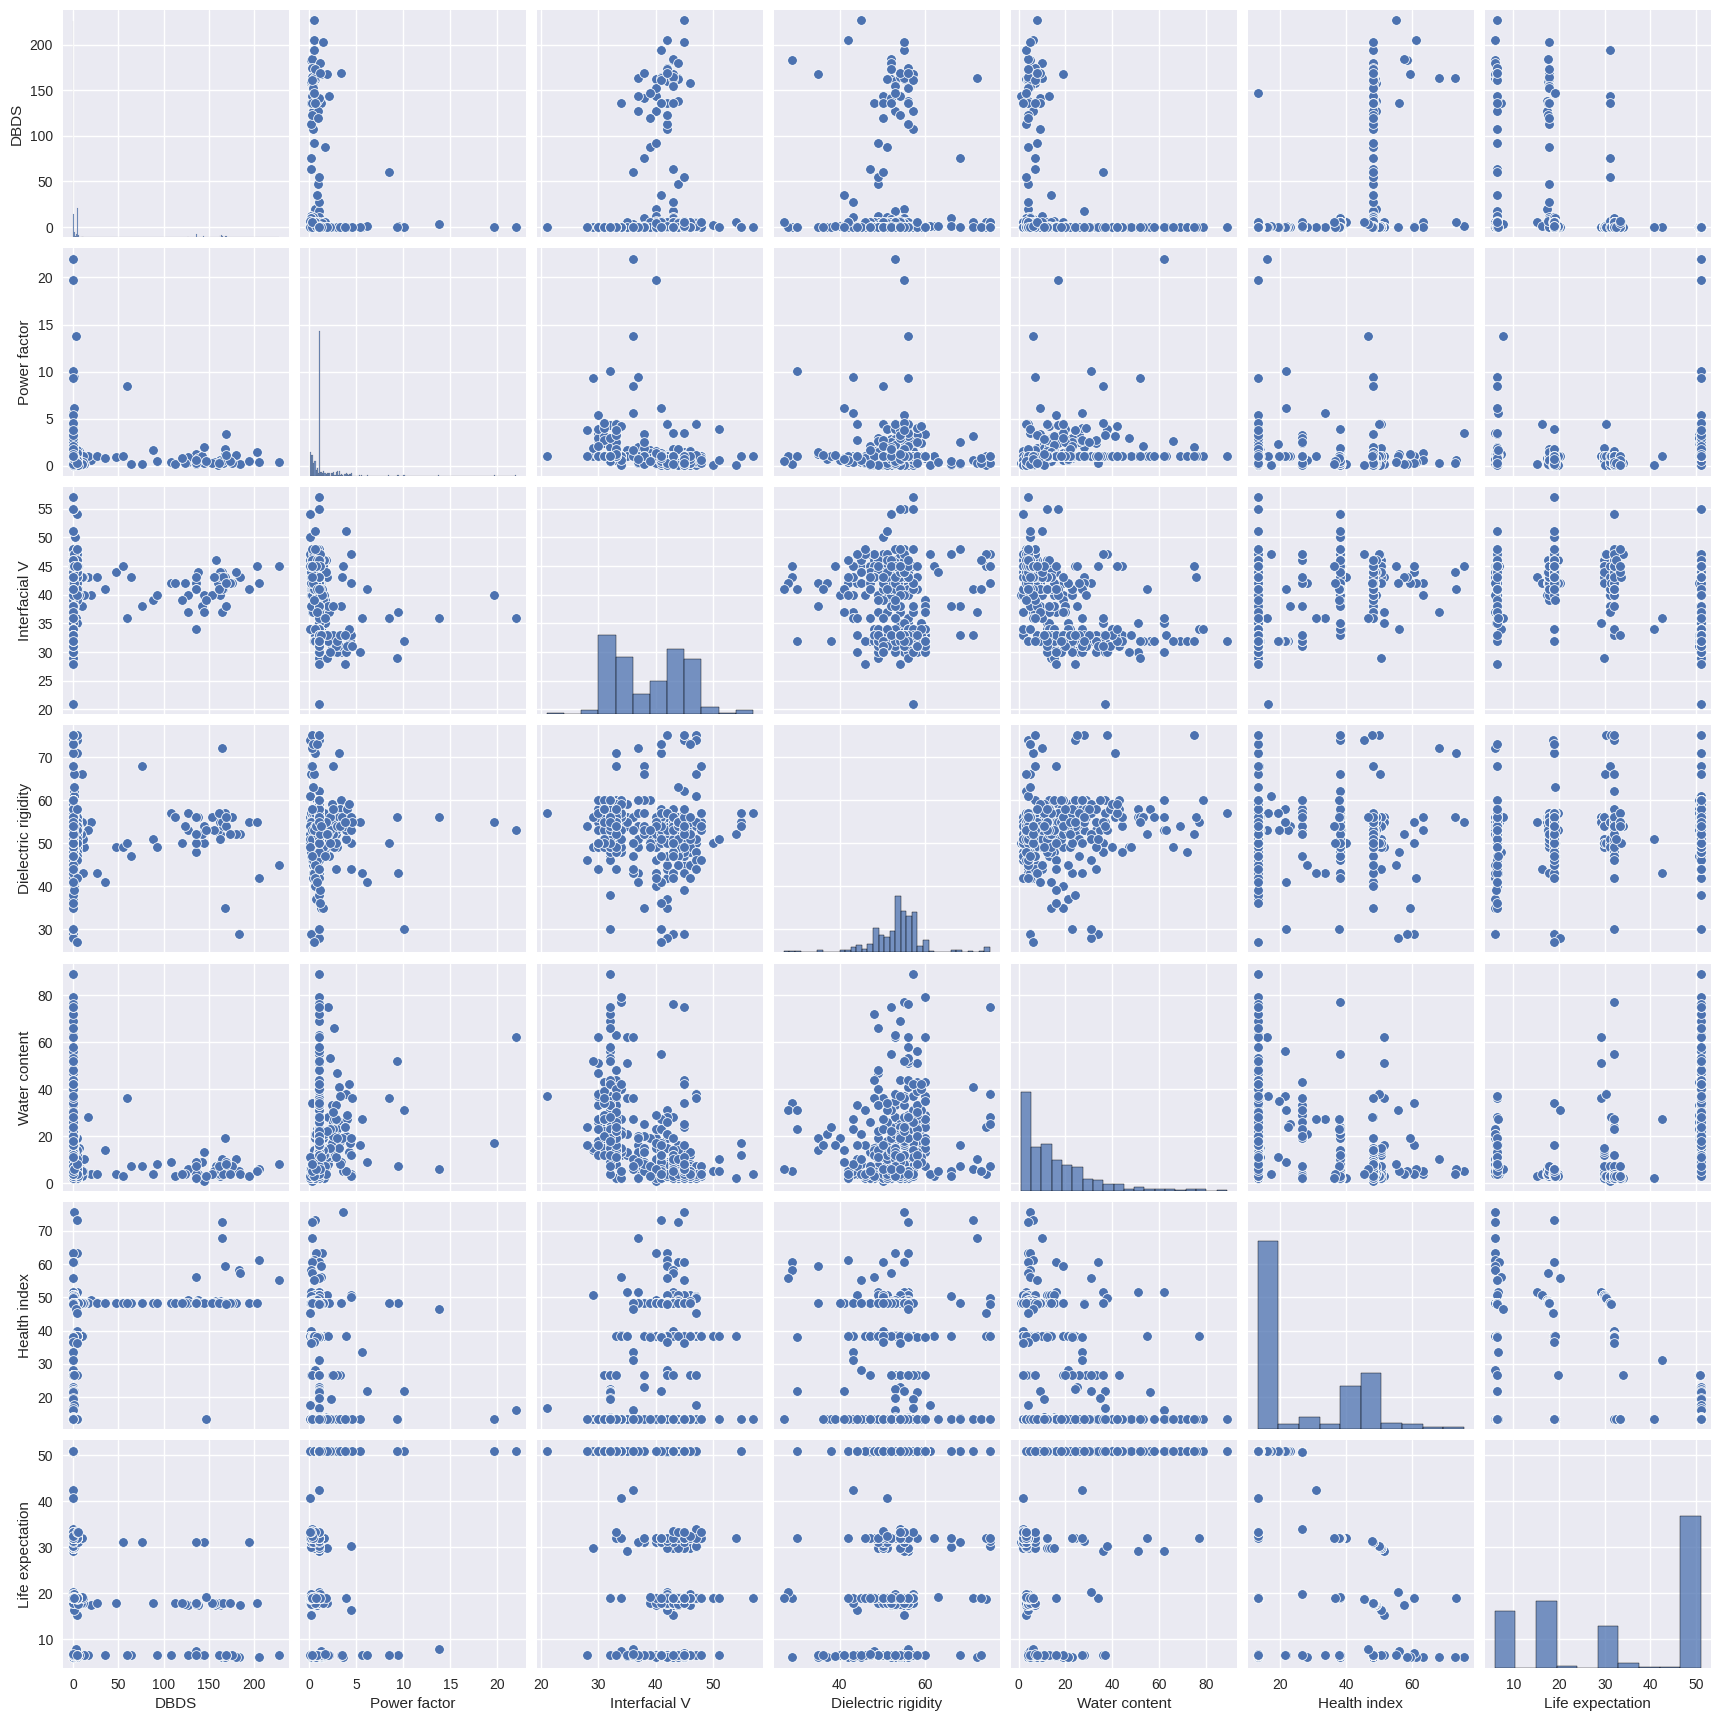

In [41]:
sns.pairplot(DF,
    x_vars=["DBDS", "Power factor", "Interfacial V", "Dielectric rigidity","Water content", "Health index", "Life expectation"],
    y_vars=["DBDS", "Power factor", "Interfacial V", "Dielectric rigidity","Water content", "Health index", "Life expectation"]
)

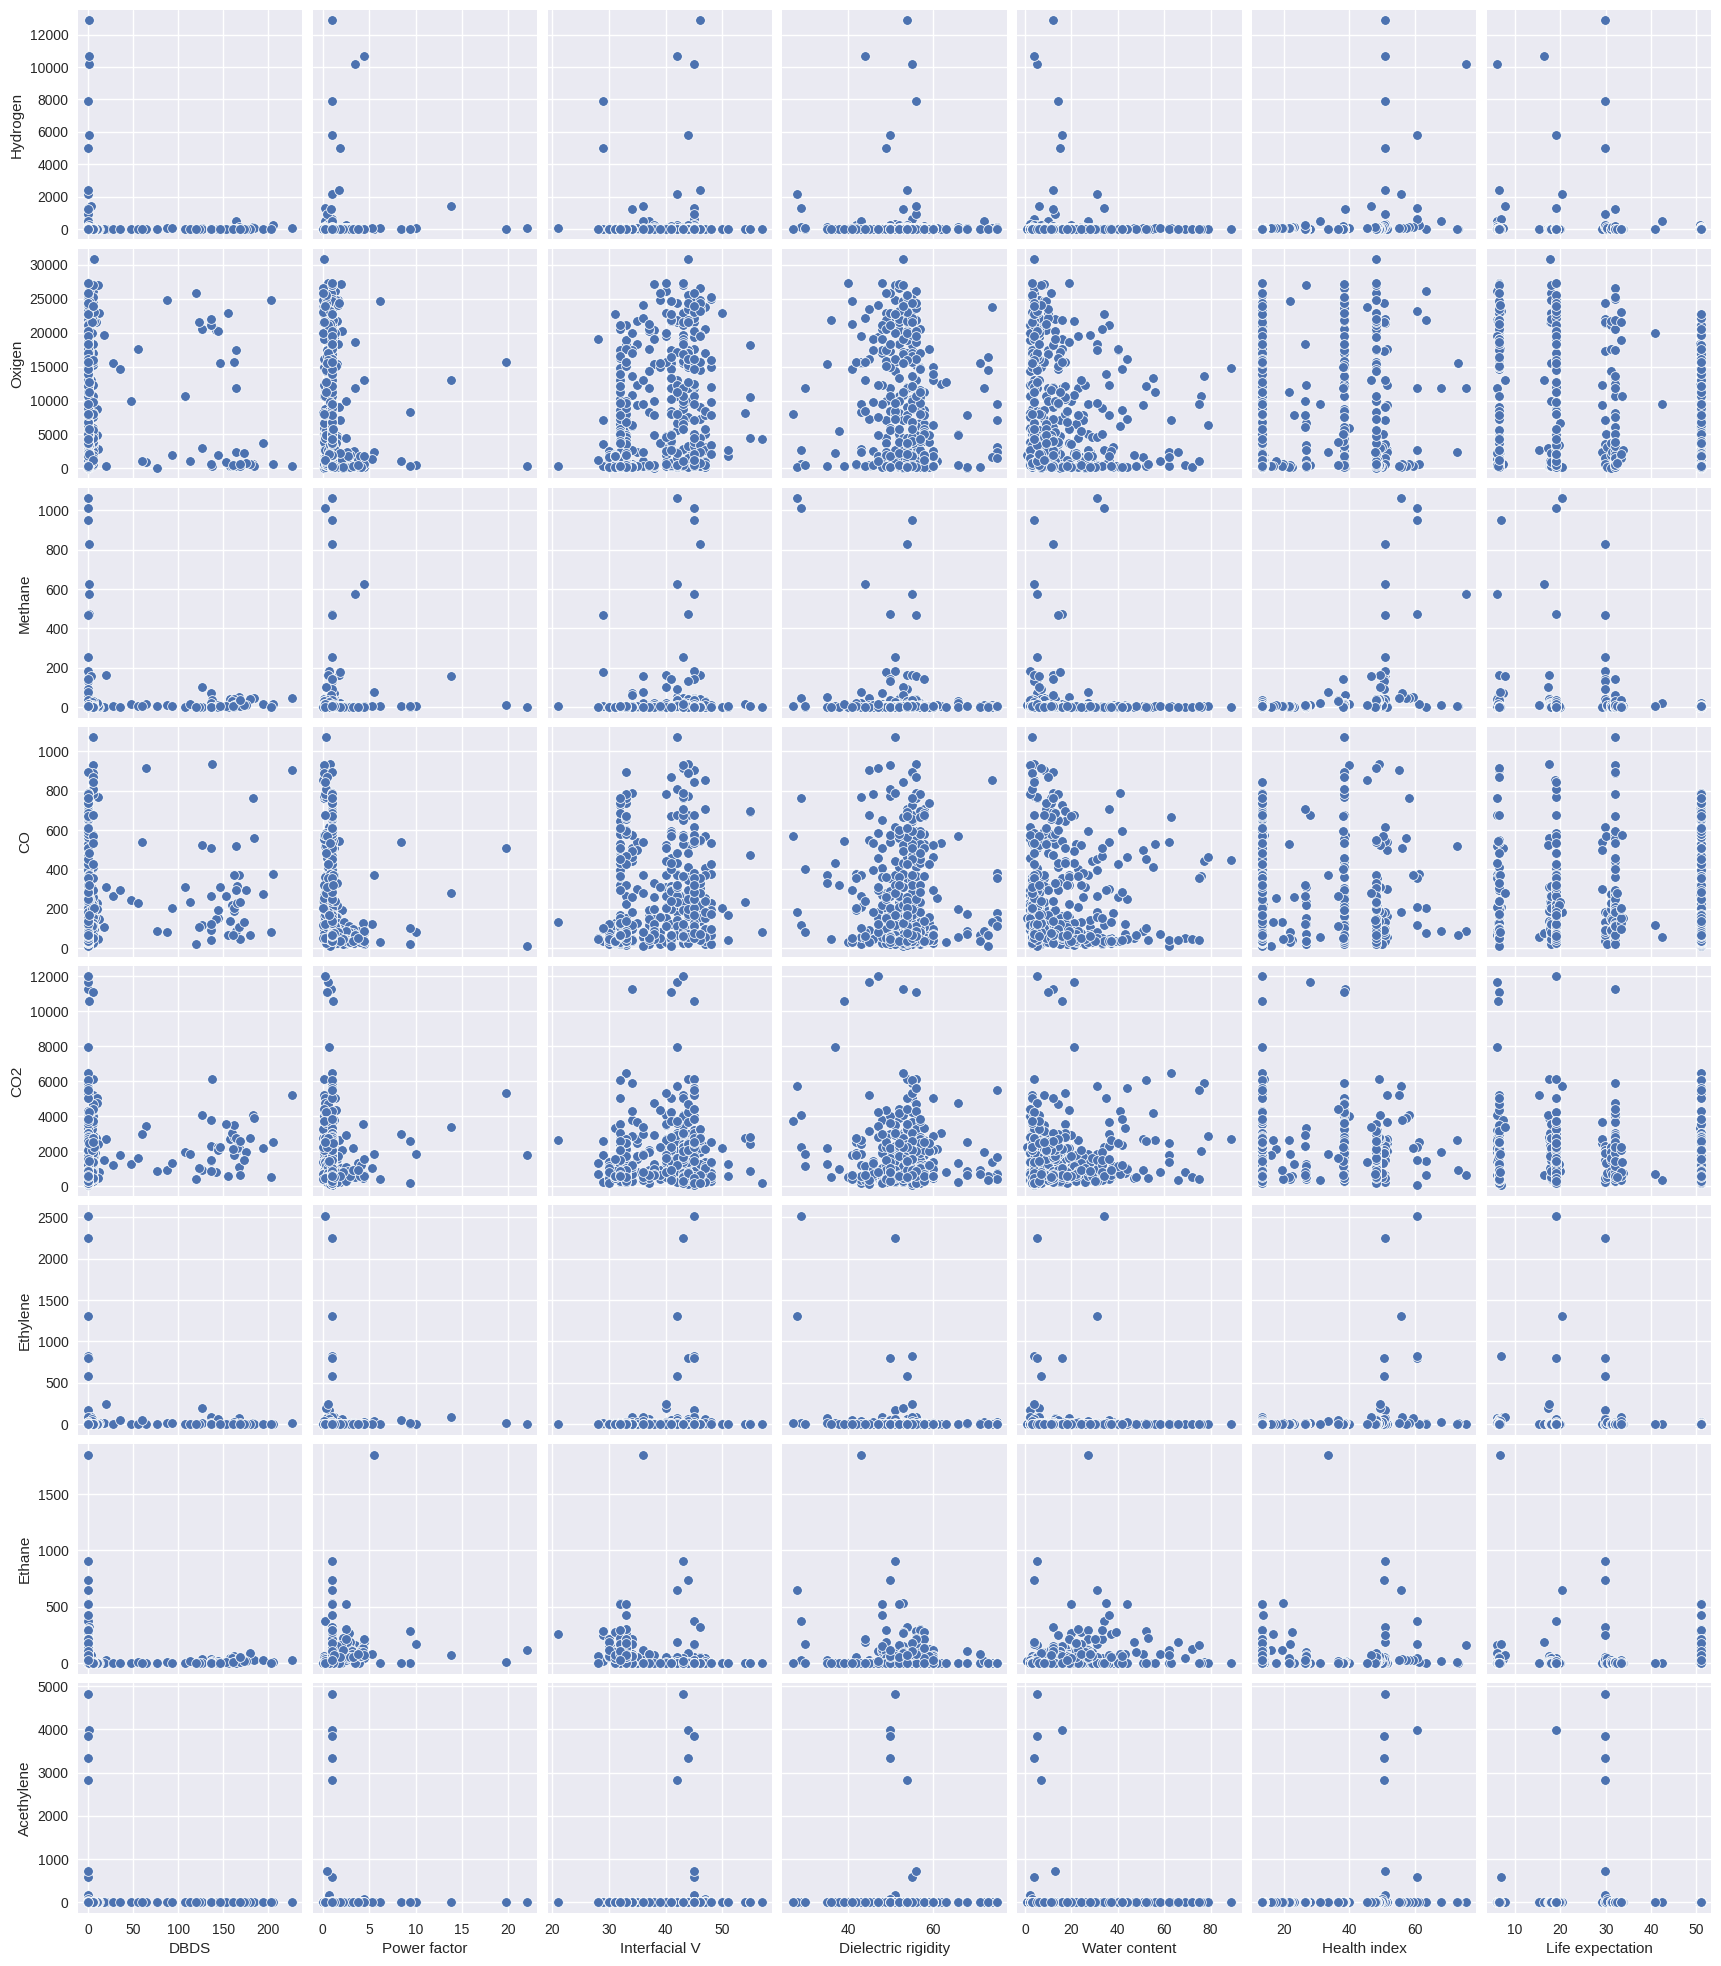

In [43]:
sns.pairplot(DF,
    x_vars=["DBDS", "Power factor", "Interfacial V", "Dielectric rigidity","Water content", "Health index", "Life expectation"],
    y_vars=["Hydrogen", "Oxigen", "Methane", "CO","CO2", "Ethylene", "Ethane", "Acethylene"]
)

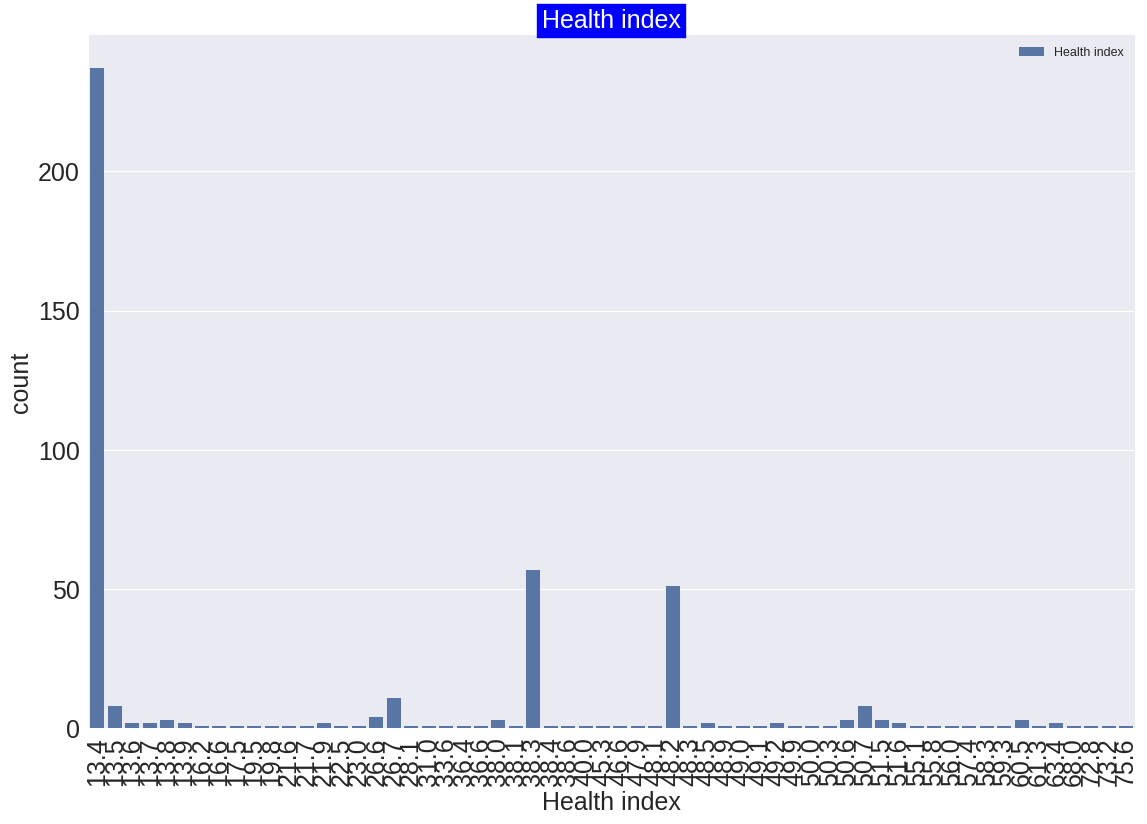

In [44]:
plt.figure (figsize = (15,10) , dpi = 90)
ax = sns.countplot (x  = 'Health index' , data = DF)
plt.xticks (rotation = 90 , fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('Health index',fontsize = 20)
plt.ylabel ('count', fontsize = 20)
plt.legend (['Health index'])
plt.title ('Health index',fontsize = 20 , backgroundcolor = 'blue' , c = 'white')
plt.grid
plt.show ()

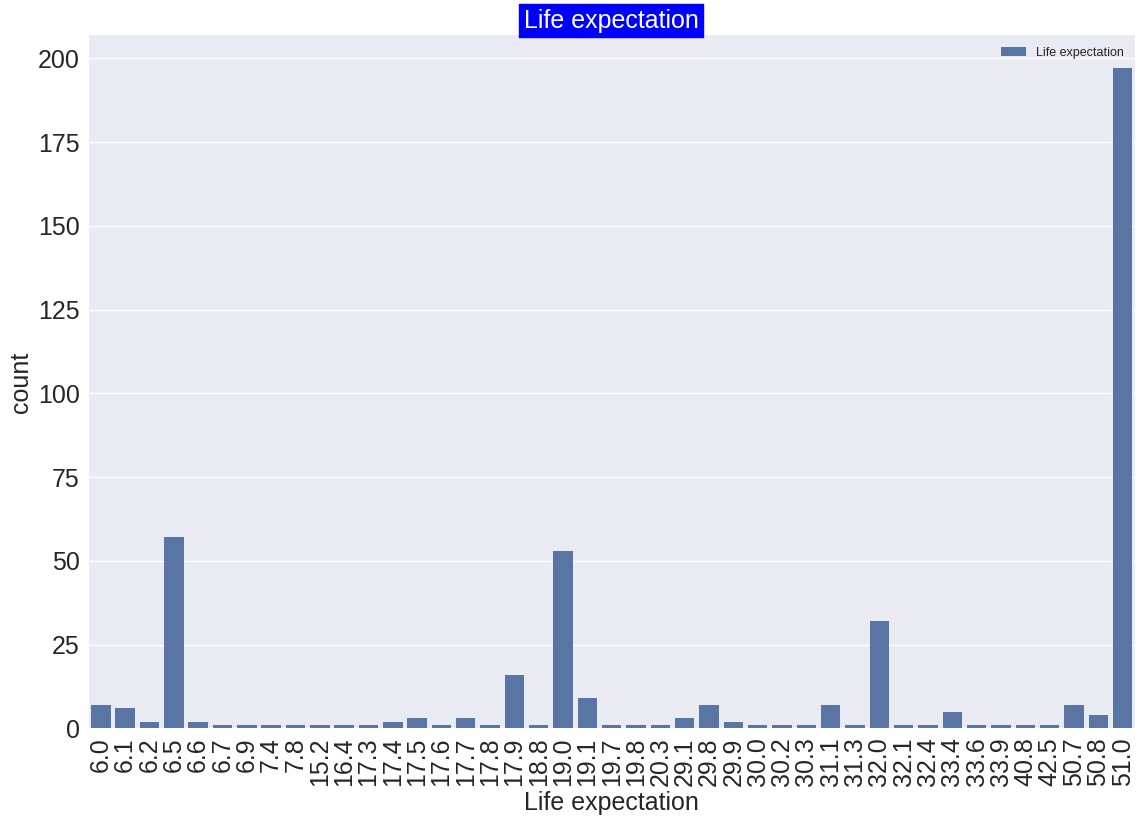

In [46]:
plt.figure (figsize = (15,10) , dpi = 90)
ax = sns.countplot (x  = 'Life expectation' , data = DF)
plt.xticks (rotation = 90 , fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('Life expectation',fontsize = 20)
plt.ylabel ('count', fontsize = 20)
plt.legend (['Life expectation'])
plt.title ('Life expectation',fontsize = 20 , backgroundcolor = 'blue' , c = 'white')
plt.grid
plt.show ()

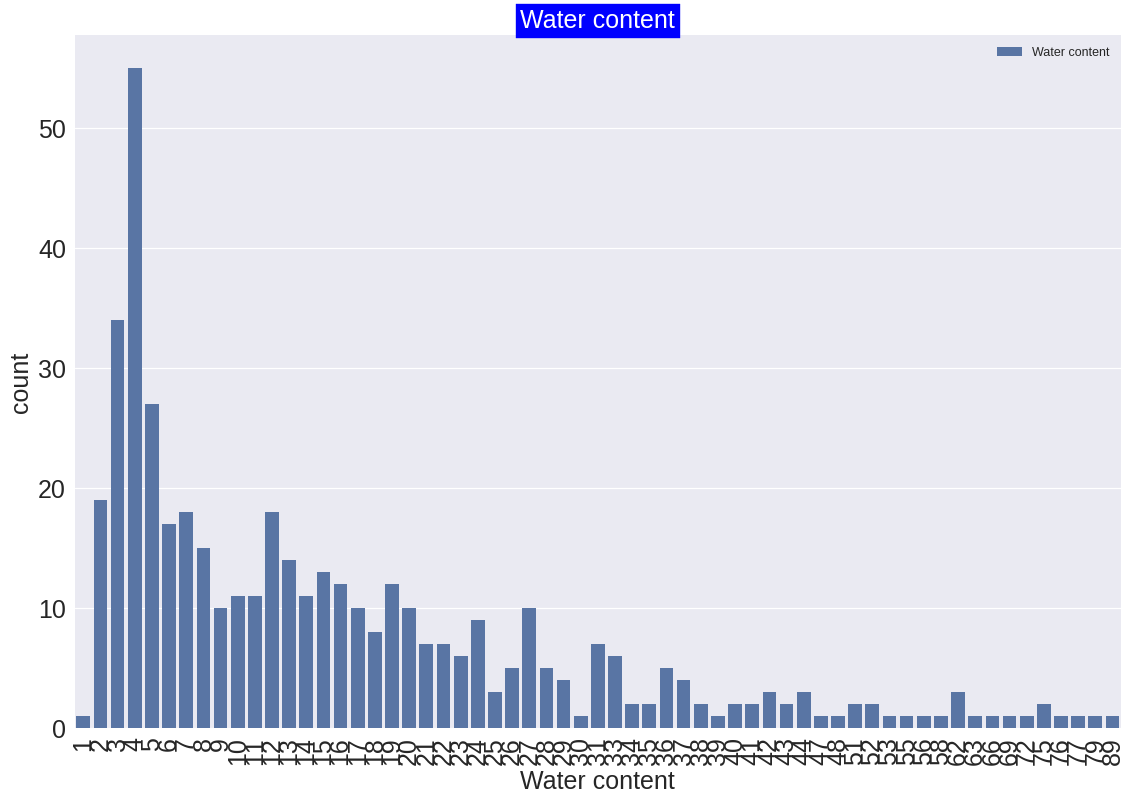

In [47]:
plt.figure (figsize = (15,10) , dpi = 90)
ax = sns.countplot (x  = 'Water content' , data = DF)
plt.xticks (rotation = 90 , fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('Water content',fontsize = 20)
plt.ylabel ('count', fontsize = 20)
plt.legend (['Water content'])
plt.title ('Water content',fontsize = 20 , backgroundcolor = 'blue' , c = 'white')
plt.grid
plt.show ()

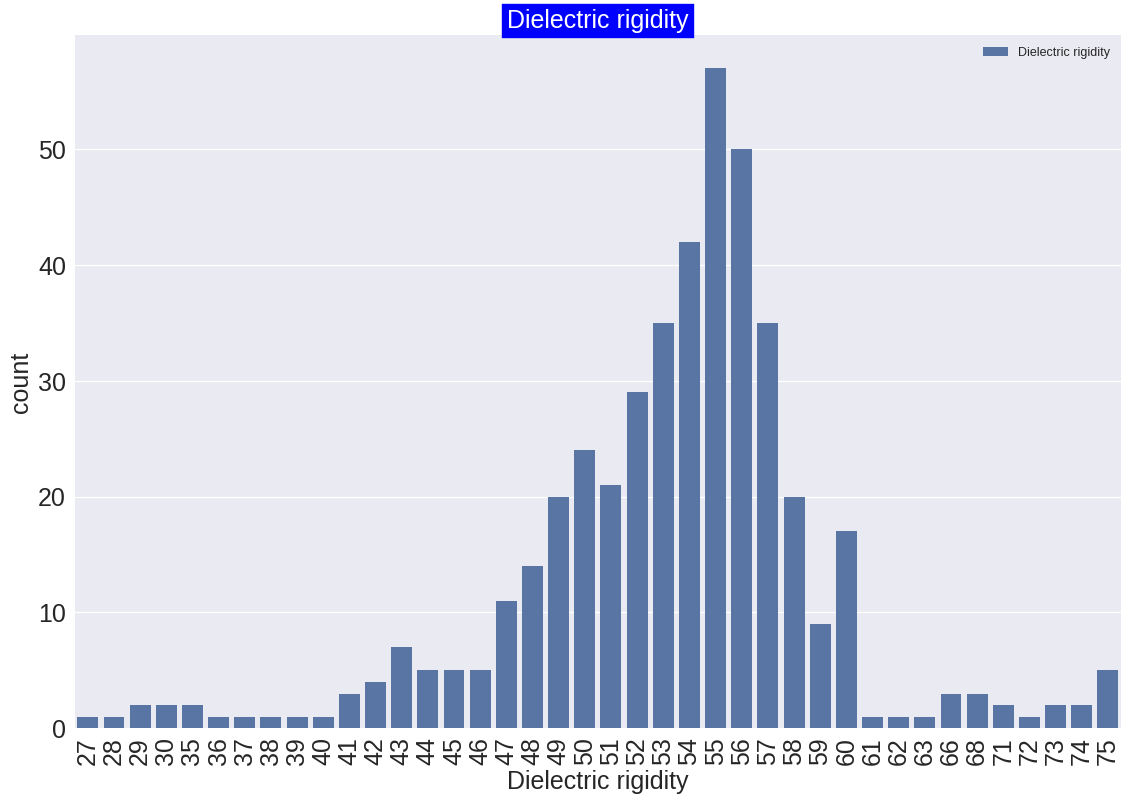

In [49]:
plt.figure (figsize = (15,10) , dpi = 90)
ax = sns.countplot (x  = 'Dielectric rigidity' , data = DF)
plt.xticks (rotation = 90 , fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('Dielectric rigidity',fontsize = 20)
plt.ylabel ('count', fontsize = 20)
plt.legend (['Dielectric rigidity'])
plt.title ('Dielectric rigidity',fontsize = 20 , backgroundcolor = 'blue' , c = 'white')
plt.grid
plt.show ()

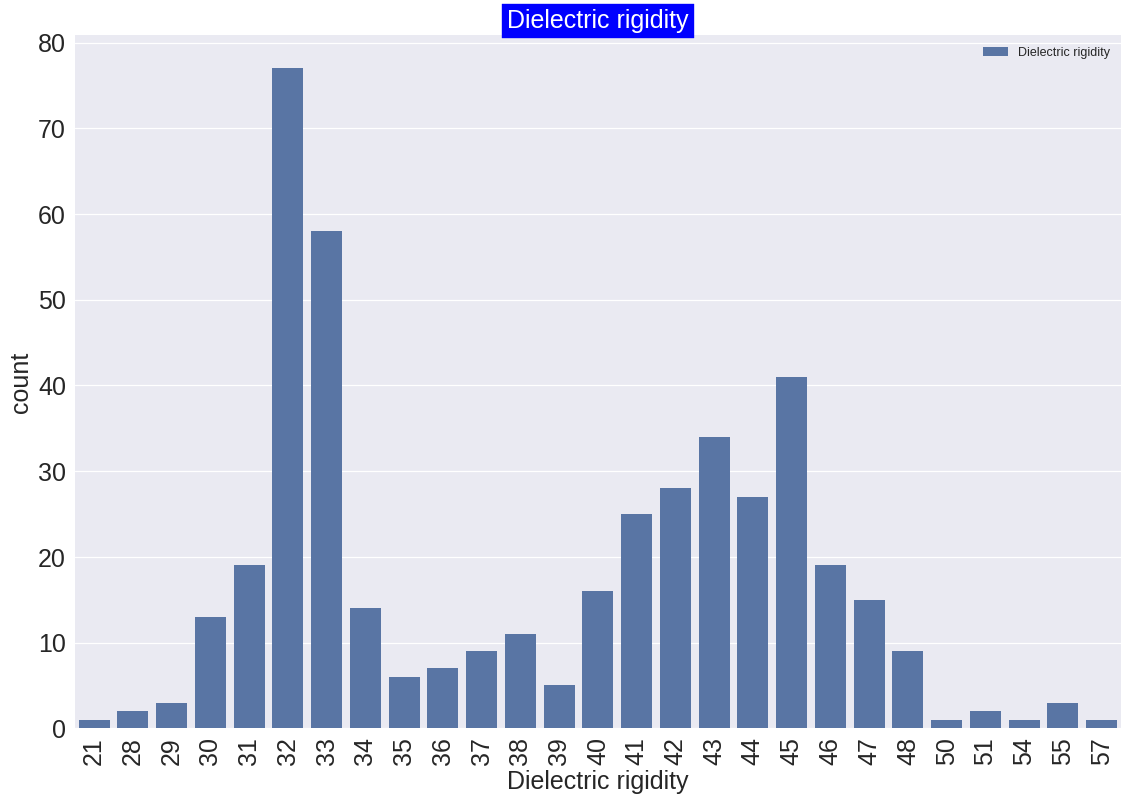

In [50]:
plt.figure (figsize = (15,10) , dpi = 90)
ax = sns.countplot (x  = 'Interfacial V' , data = DF)
plt.xticks (rotation = 90 , fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('Dielectric rigidity',fontsize = 20)
plt.ylabel ('count', fontsize = 20)
plt.legend (['Dielectric rigidity'])
plt.title ('Dielectric rigidity',fontsize = 20 , backgroundcolor = 'blue' , c = 'white')
plt.grid
plt.show ()

In [51]:
Df = DF.copy()

In [52]:
#Scaling

scaler = StandardScaler()
scaler.fit(Df)
scaled_Df = pd.DataFrame(scaler.transform(Df),columns= Df.columns )
print("All features are now scaled")

All features are now scaled


In [53]:
print("Dataframe to be used for further modelling:")
scaled_Df.head()

Dataframe to be used for further modelling:


Hydrogen    Oxigen  Nitrogen   Methane        CO       CO2  Ethylene  \
0  9.374542  0.486530 -1.030562  5.203866 -0.662015 -0.651782 -0.145507   
1 -0.149684  0.911585 -0.465894 -0.168910 -0.745068 -0.474784 -0.080644   
2 -0.137542 -0.639705  0.881940 -0.140532  1.230737  0.594502 -0.118480   
3  0.303317  0.481872  0.051442 -0.093237 -0.670757  0.166910  0.011246   
4 -0.148750  2.182450  0.955782 -0.206746 -0.141836 -0.147551 -0.075238   

     Ethane  Acethylene      DBDS  Power factor  Interfacial V  \
0  0.861436   -0.113155 -0.339975      1.162154       1.070458   
1 -0.378699   -0.080995 -0.254421     -0.390332       0.418336   
2 -0.332194   -0.108208  3.146333     -0.542949       0.907428   
3 -0.215931   -0.113155  3.146333     -0.553474      -0.233787   
4 -0.394201   -0.080995 -0.254421     -0.000895       0.255305   

   Dielectric rigidity  Water content  Health index  Life expectation  
0             0.243019      -0.730885      3.081909         -1.542249  
1             2.718903      -0.665268      2.932589         -0.813435  
2             0.397762      -0.796502      2.907703         -1.542249  
3             2.873646      -0.402802      2.609063         -1.542249  
4             0.397762      -0.796502      2.322866         -1.542249

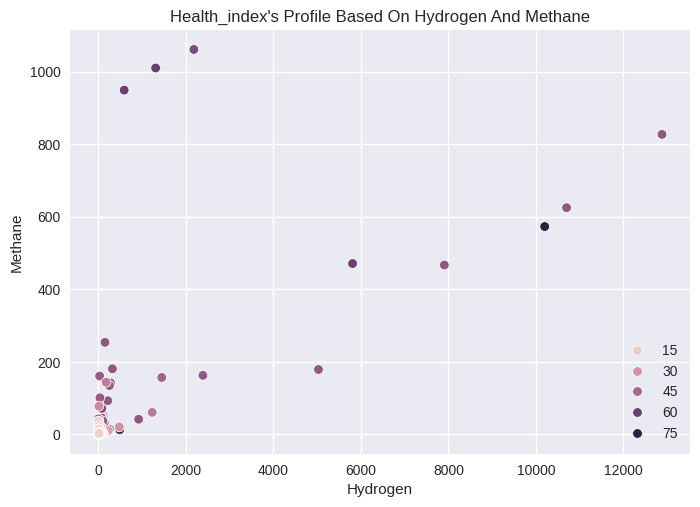

In [55]:
pl = sns.scatterplot(data = Df ,x=Df["Hydrogen"], y=Df["Methane"],hue=Df["Health index"])
pl.set_title("Health_index's Profile Based On Hydrogen And Methane")
plt.legend()
plt.show()

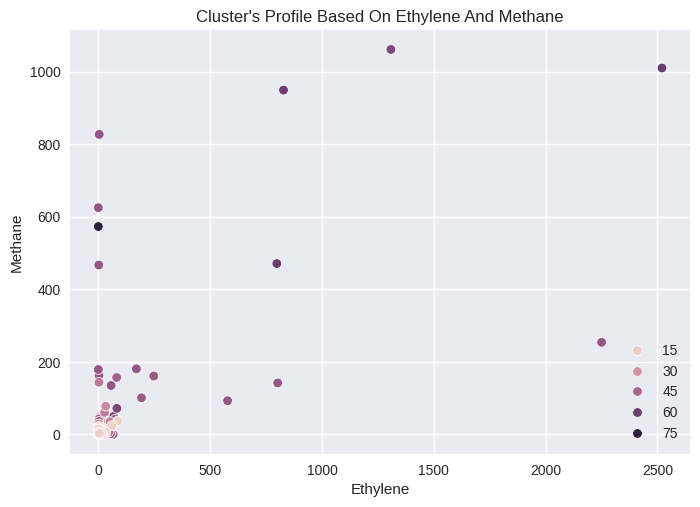

In [56]:
pl = sns.scatterplot(data = Df ,x=Df["Ethylene"], y=Df["Methane"],hue=Df["Health index"])
pl.set_title("Cluster's Profile Based On Ethylene And Methane")
plt.legend()
plt.show()

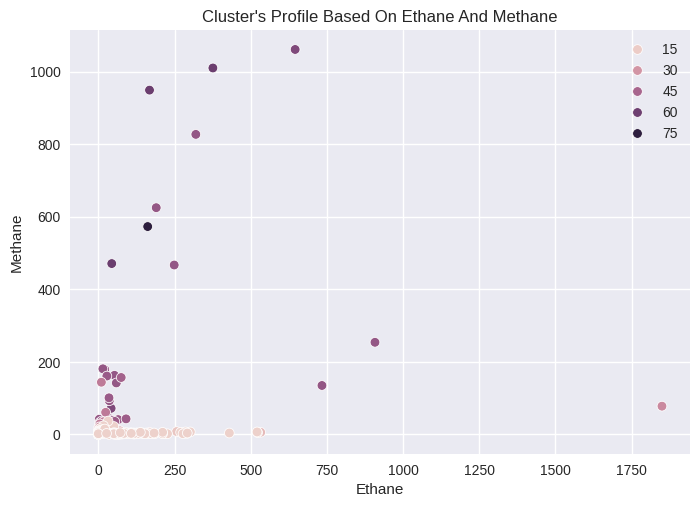

In [57]:
pl = sns.scatterplot(data = Df ,x=Df["Ethane"], y=Df["Methane"],hue=Df["Health index"])
pl.set_title("Cluster's Profile Based On Ethane And Methane")
plt.legend()
plt.show()

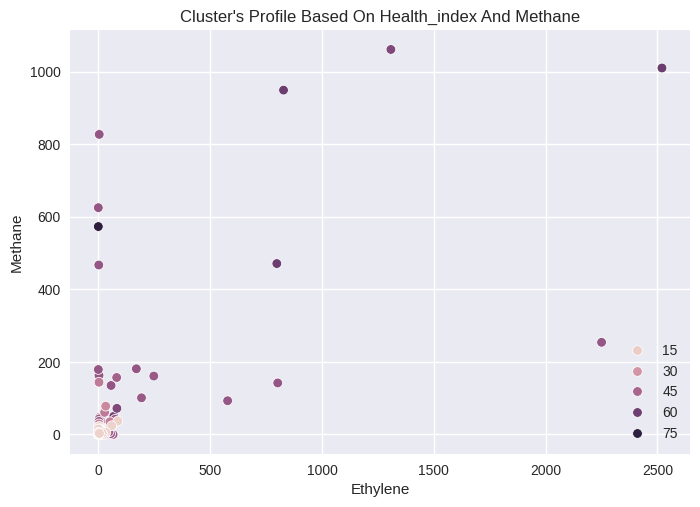

In [58]:
pl = sns.scatterplot(data = Df ,x=Df["Ethylene"], y=Df["Methane"],hue=Df["Health index"])
pl.set_title("Cluster's Profile Based On Health_index And Methane")
plt.legend()
plt.show()

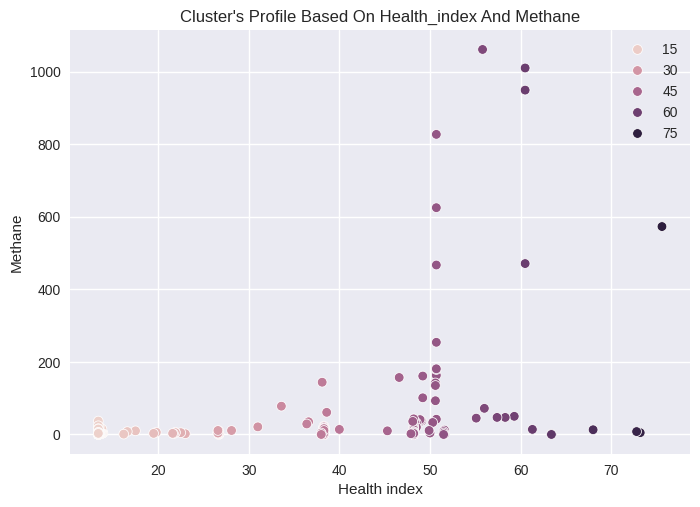

In [59]:
pl = sns.scatterplot(data = Df ,x=Df["Health index"], y=Df["Methane"],hue=Df["Health index"])
pl.set_title("Cluster's Profile Based On Health_index And Methane")
plt.legend()
plt.show()

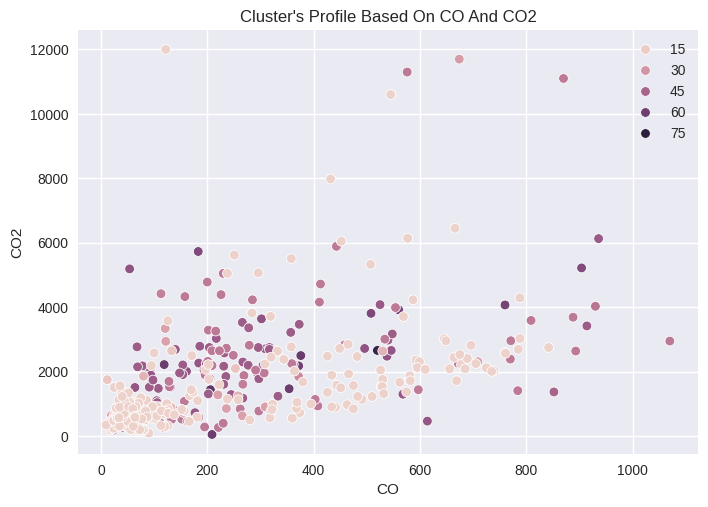

In [60]:
pl = sns.scatterplot(data = Df ,x=Df["CO"], y=Df["CO2"],hue=Df["Health index"])
pl.set_title("Cluster's Profile Based On CO And CO2")
plt.legend()
plt.show()

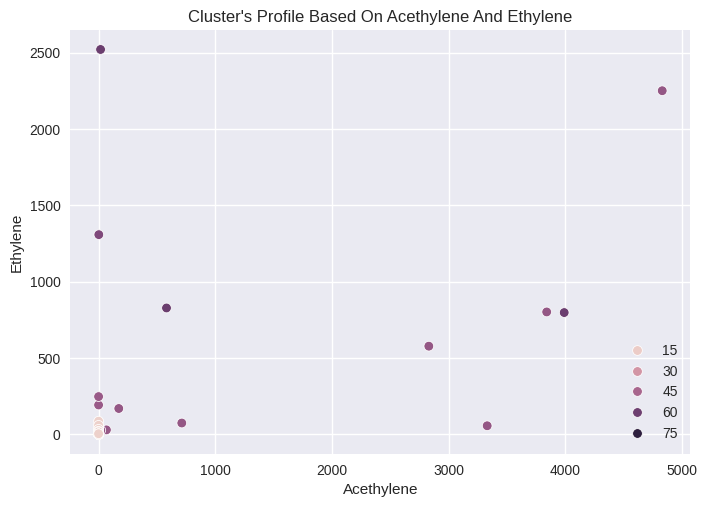

In [61]:
pl = sns.scatterplot(data = Df ,x=Df["Acethylene"], y=Df["Ethylene"],hue=Df["Health index"])
pl.set_title("Cluster's Profile Based On Acethylene And Ethylene")
plt.legend()
plt.show()

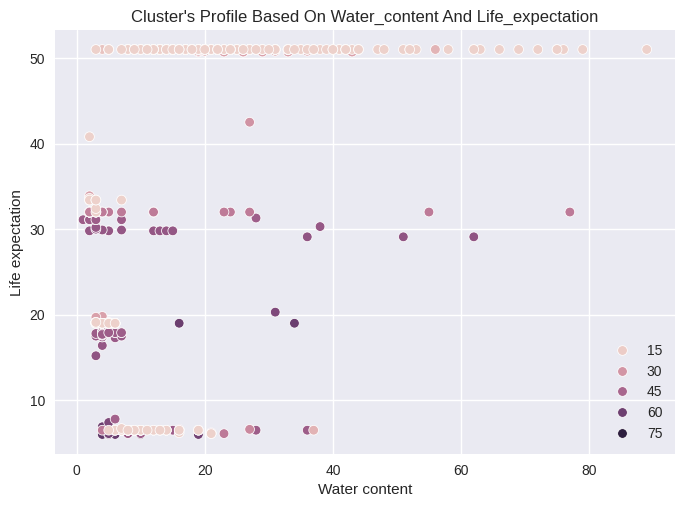

In [63]:
pl = sns.scatterplot(data = Df ,x=Df["Water content"], y=Df["Life expectation"],hue=Df["Health index"])
pl.set_title("Cluster's Profile Based On Water_content And Life_expectation")
plt.legend()
plt.show()

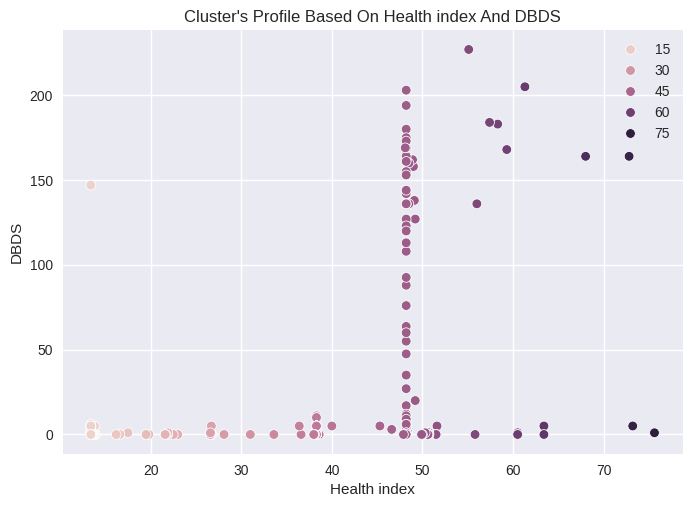

In [65]:
pl = sns.scatterplot(data = Df ,x=Df["Health index"], y=Df["DBDS"],hue=Df["Health index"])
pl.set_title("Cluster's Profile Based On Health index And DBDS")
plt.legend()
plt.show()

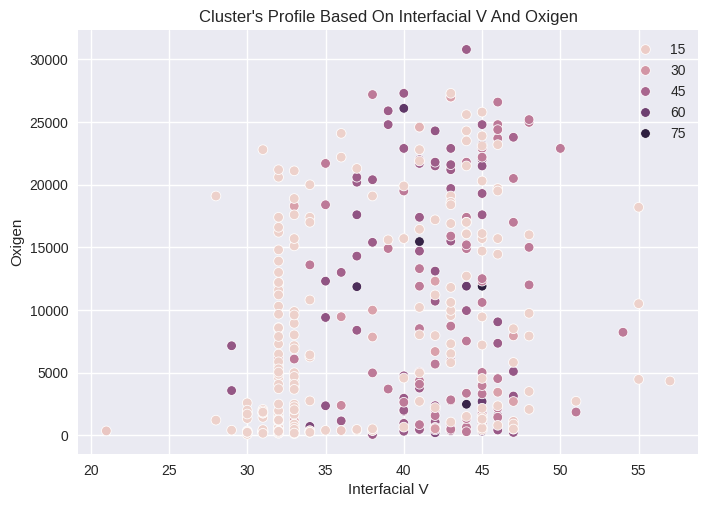

In [66]:
pl = sns.scatterplot(data = Df ,x=Df["Interfacial V"], y=Df["Oxigen"],hue=Df["Health index"])
pl.set_title("Cluster's Profile Based On Interfacial V And Oxigen")
plt.legend()
plt.show()

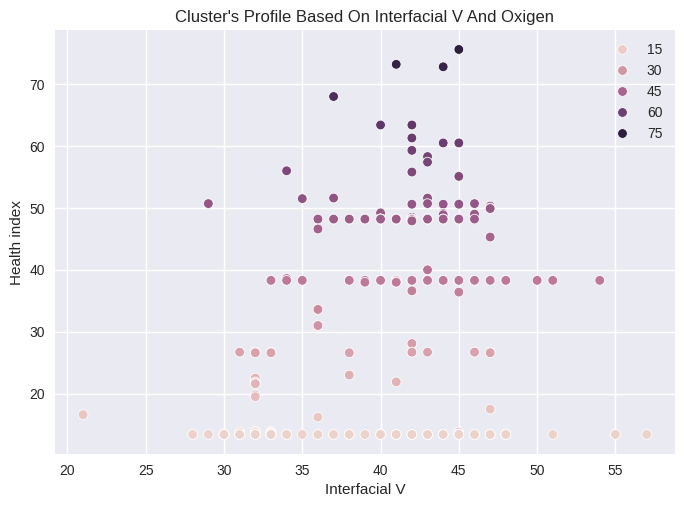

In [67]:
pl = sns.scatterplot(data = Df ,x=Df["Interfacial V"], y=Df["Health index"],hue=Df["Health index"])
pl.set_title("Cluster's Profile Based On Interfacial V And Oxigen")
plt.legend()
plt.show()

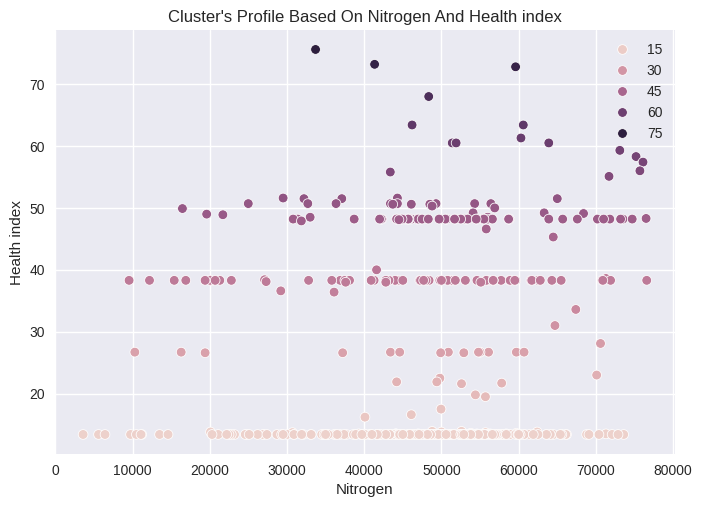

In [68]:
pl = sns.scatterplot(data = Df ,x=Df["Nitrogen"], y=Df["Health index"],hue=Df["Health index"])
pl.set_title("Cluster's Profile Based On Nitrogen And Health index")
plt.legend()
plt.show()

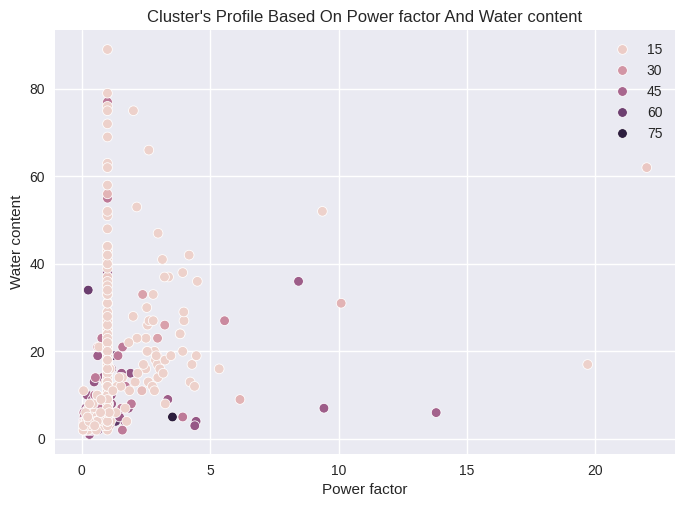

In [69]:
pl = sns.scatterplot(data = Df ,x=Df["Power factor"], y=Df["Water content"],hue=Df["Health index"])
pl.set_title("Cluster's Profile Based On Power factor And Water content")
plt.legend()
plt.show()

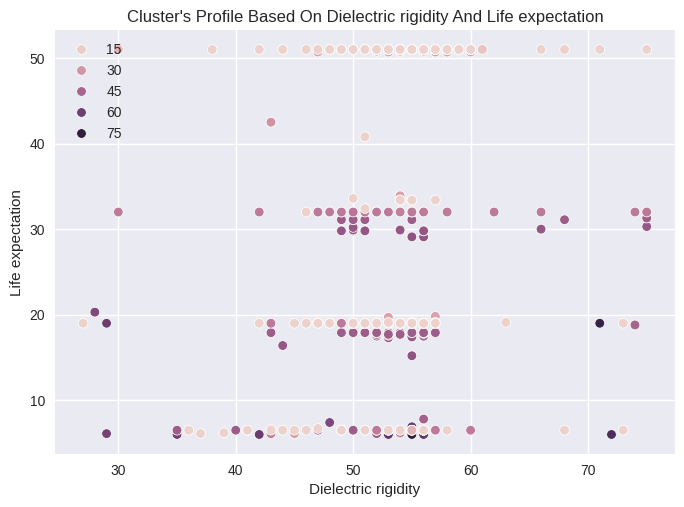

In [70]:
pl = sns.scatterplot(data = Df ,x=Df["Dielectric rigidity"], y=Df["Life expectation"],hue=Df["Health index"])
pl.set_title("Cluster's Profile Based On Dielectric rigidity And Life expectation")
plt.legend()
plt.show()

In [82]:
x1 = Df.drop('Health index', axis=1)
y1 = Df['Health index'].values.reshape(-1,1)

In [83]:
x1_train , x1_test , y1_train , y1_test = train_test_split (x1 , y1 , test_size = 0.2 , random_state = 1)

In [84]:
print ('x1_train:' , x1_train.shape)
print ('x1_test:' , x1_test.shape)
print ('y1_train:' , y1_train.shape)
print ('y1_test:' , y1_test.shape)

x1_train: (357, 15)
x1_test: (90, 15)
y1_train: (357, 1)
y1_test: (90, 1)


In [85]:
regressor = LinearRegression()
kfold_validation = KFold(4)
regressor.fit(x1_train, y1_train)
y1_pred = regressor.predict(x1_test)

In [86]:
print(regressor.intercept_)
print(regressor.coef_)

[11.76249281]
[[ 1.46407740e-03  2.04532160e-05  4.72455134e-05  2.60888433e-02
   2.73996099e-03  2.30886972e-04  1.03928557e-03 -8.20882222e-04
   4.15671671e-03  1.17817449e-01  1.57944795e-01  3.05385386e-01
   1.39179937e-01  1.94469024e-02 -3.48974361e-01]]


In [87]:
print('Mean Absolute Error:' , metrics.mean_absolute_error(y1_test,y1_pred))
print('Mean Squared Error:' , metrics.mean_squared_error(y1_test,y1_pred))
print('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y1_test,y1_pred)))
print('R2 Score: ' ,metrics.r2_score(y1_test,y1_pred))

Mean Absolute Error: 7.778590194134933
Mean Squared Error: 117.69272250404806
Root Mean Squared Error: 10.848627678377024
R2 Score:  0.4892516786536173


In [88]:
results = cross_val_score(regressor, x1_train, y1_train, cv = kfold_validation)
# show score
print(results)
#show mean score
print(np.mean(results))

[0.61035993 0.5264505  0.65096034 0.38225516]
0.5425064841321557


In [89]:
x1_test.insert(1,"y1_test",y1_test)
x1_test.insert(2,"y1_pred", y1_pred)
compare = pd.DataFrame({"Actual": y1_test.flatten() , "predicted": y1_pred.flatten()})
compare

Actual  predicted
0     19.5  15.556405
1     13.4  14.340323
2     21.9  32.264856
3     50.6  40.523655
4     13.4  21.479372
..     ...        ...
85    48.5  48.470693
86    38.3  23.971488
87    13.4  33.036692
88    13.4  16.376229
89    13.4  15.646001

[90 rows x 2 columns]

In [90]:
df2 = Df.copy()
df2

Hydrogen  Oxigen  Nitrogen  Methane   CO   CO2  Ethylene  Ethane  \
6       10200   11900     33700      573   87   611         0     162   
7           3   15459     41347        5   68   902        12       2   
8          16    2470     59600        8  520  2660         5       8   
9         488   11861     48353       13   85  1957        29      23   
10          4   26100     60600        1  206  1440        13       0   
..        ...     ...       ...      ...  ...   ...       ...     ...   
465        15     227     52900        3   60   853         3      84   
466        15     334     47100        3   64   622         3     108   
467        15    1280     35000        2  675  2530         0       0   
468        15     169     50600        5   77   532         0      72   
469        15     308     39700        3   64   581         5      27   

     Acethylene   DBDS  Power factor  Interfacial V  Dielectric rigidity  \
6             0    1.0          3.53             45                   55   
7            13    5.0          0.58             41                   71   
8             2  164.0          0.29             44                   56   
9             0  164.0          0.27             37                   72   
10           13    5.0          1.32             40                   56   
..          ...    ...           ...            ...                  ...   
465           0    0.0          1.00             32                   56   
466           0    0.0          1.00             32                   55   
467           0    5.0          0.30             45                   58   
468           0    0.0          1.21             33                   54   
469           0    0.0          1.00             32                   60   

     Water content  Health index  Life expectation  
6                5          75.6               6.0  
7                6          73.2              19.0  
8                4          72.8               6.0  
9               10          68.0               6.0  
10               4          63.4               6.0  
..             ...           ...               ...  
465             28          13.4              51.0  
466             12          13.4              51.0  
467              8          13.4               6.5  
468             11          13.4              51.0  
469             18          13.4              51.0  

[447 rows x 16 columns]

In [93]:
Dielectric_rigidity2 = df2.Dielectric_rigidity**2
Water_content2 = df2.Water_content**2
Interfacial_V2 = df2.Interfacial_V**2
df2.insert(4, "Life_expectation2" ,Dielectric_rigidity2)
df2.insert(5, "Water_content2" ,Water_content2)
df2.insert(6, "Interfacial_V2" ,Interfacial_V2)
X= Df.drop('Health_index' , axis = 1)
Y = Df.Health_index.values.reshape(-1,1)
X_train, X_test , Y_train , Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)
print('Mean Absolute Error:' , metrics.mean_absolute_error(Y_test,Y_pred))
print('Mean Squared Error:' , metrics.mean_squared_error(Y_test,Y_pred))
print('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))
print('R2 Score: ' ,metrics.r2_score(Y_test,Y_pred))

df2.insert(4, "Life expectation2" ,Dielectric_rigidity2)
df2.insert(5, "Water content2" ,Water_content2)
df2.insert(5, "Interfacial V2" ,Interfacial_V2)
X= Df.drop ('Health index' , axis = 1)
Y = Df.Health_index.values.reshape (-1,1)
X_train, X_test , Y_train , Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)
print('Mean Absolute Error:' , metrics.mean_absolute_error(Y_test,Y_pred))
print('Mean Squared Error:' , metrics.mean_squared_error(Y_test,Y_pred))
print('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))
print('R2 Score: ' ,metrics.r2_score(Y_test,Y_pred))

AttributeError: 'DataFrame' object has no attribute 'Dielectric_rigidity'